# Importing libraries for data gathering and cleaning

In [1]:
#Libraries to be used for our model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer



# Data Gathering

In [2]:
#Loading dataset
data = pd.read_csv("drugsComTrain_raw.csv")

In [3]:
#exploring dataset columns with their datatypes
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [4]:
#Exploring first five rows of the dataset 
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
print ("The shape of the train set given is : ", data.shape)

The shape of the train set given is :  (161297, 7)


In [6]:
#Accessing dataset shape(rows and columns)
data.shape

(161297, 7)

In [7]:
#Converting dataset columns' names to lowercase for easy access
data.columns = data.columns.str.lower()

In [8]:
# Sorting the dataframe for easy access
data.sort_values(['uniqueid'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)

# Data cleaning

In [9]:
#Identifying null / missing values and handling them
data['condition'].isnull().sum(axis = 0)


899

In [10]:
# Replace NaN values in 'condition' column with empty strings
data['condition'] = data['condition'].fillna('')


In [11]:
data.dtypes

uniqueid        int64
drugname       object
condition      object
review         object
rating          int64
date           object
usefulcount     int64
dtype: object

In [12]:
#Accessing first ten rows after the missing values have been removed
data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
1,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
2,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
3,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
4,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
5,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
6,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
7,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2
8,12,Medroxyprogesterone,Abnormal Uterine Bleeding,"""First month was awesome. Absolutely wonderful...",3,18-Oct-15,7
9,14,Medroxyprogesterone,Birth Control,"""I started the Depo shot a year ago. Originall...",2,17-Oct-15,7


In [13]:
#Exploring dataset and displaying 10 top drugname with rating of 1
data.loc[data['rating'] == 1, :]['drugname'].value_counts().head(10)

Ethinyl estradiol / norethindrone     582
Miconazole                            569
Etonogestrel                          530
Levonorgestrel                        383
Nexplanon                             371
Ethinyl estradiol / norgestimate      351
Medroxyprogesterone                   348
Depo-Provera                          326
Ethinyl estradiol / levonorgestrel    294
Tioconazole                           288
Name: drugname, dtype: int64

In [14]:
data.at[data['usefulcount'].idxmin(), 'drugname']

'Medroxyprogesterone'

In [15]:
data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
1,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
2,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
3,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
4,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
5,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
6,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
7,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2
8,12,Medroxyprogesterone,Abnormal Uterine Bleeding,"""First month was awesome. Absolutely wonderful...",3,18-Oct-15,7
9,14,Medroxyprogesterone,Birth Control,"""I started the Depo shot a year ago. Originall...",2,17-Oct-15,7


# Finding outliers

<Axes: >

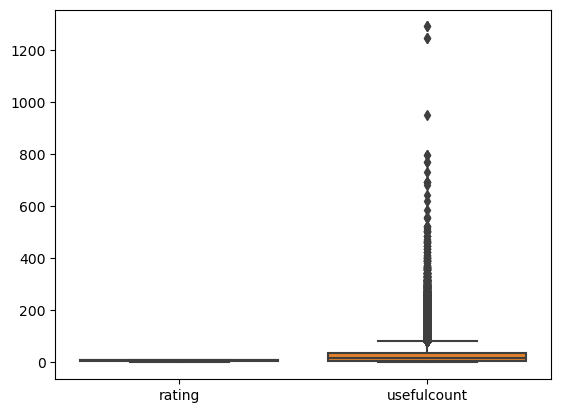

In [16]:
# Select the numerical columns where you want to detect outliers
numerical_columns = ['rating', 'usefulcount']

# Visualize the distribution of the numerical columns
sns.boxplot(data=data[numerical_columns])


In [17]:
#z-score for columns where l calculate outliers from
from scipy.stats import zscore

# Calculate z-scores for the numerical columns
df_zscores = data[['rating', 'usefulcount']].apply(zscore)

# Identify rows with z-scores beyond a threshold (e.g., 3)
outlier_threshold = 3
outliers = df_zscores[(df_zscores > outlier_threshold).any(axis=1)]

# Print the rows with outliers
print(outliers)



          rating  usefulcount
482     0.918499     6.153102
610     0.918499     6.070693
667     0.612906     5.356478
1366    0.918499     3.900579
1367    0.612906     4.312626
...          ...          ...
161134  0.918499     3.351184
161143  0.918499     3.543472
161144  0.612906     3.543472
161146  0.307312     3.296244
161148  0.307312     4.477445

[2905 rows x 2 columns]


# Descriptive analysis 

In [18]:
data.describe()

,uniqueid,rating,usefulcount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [19]:
# Converting the date in to date time format after finding descriptive analysis
data['date'] = pd.to_datetime(data['date'])

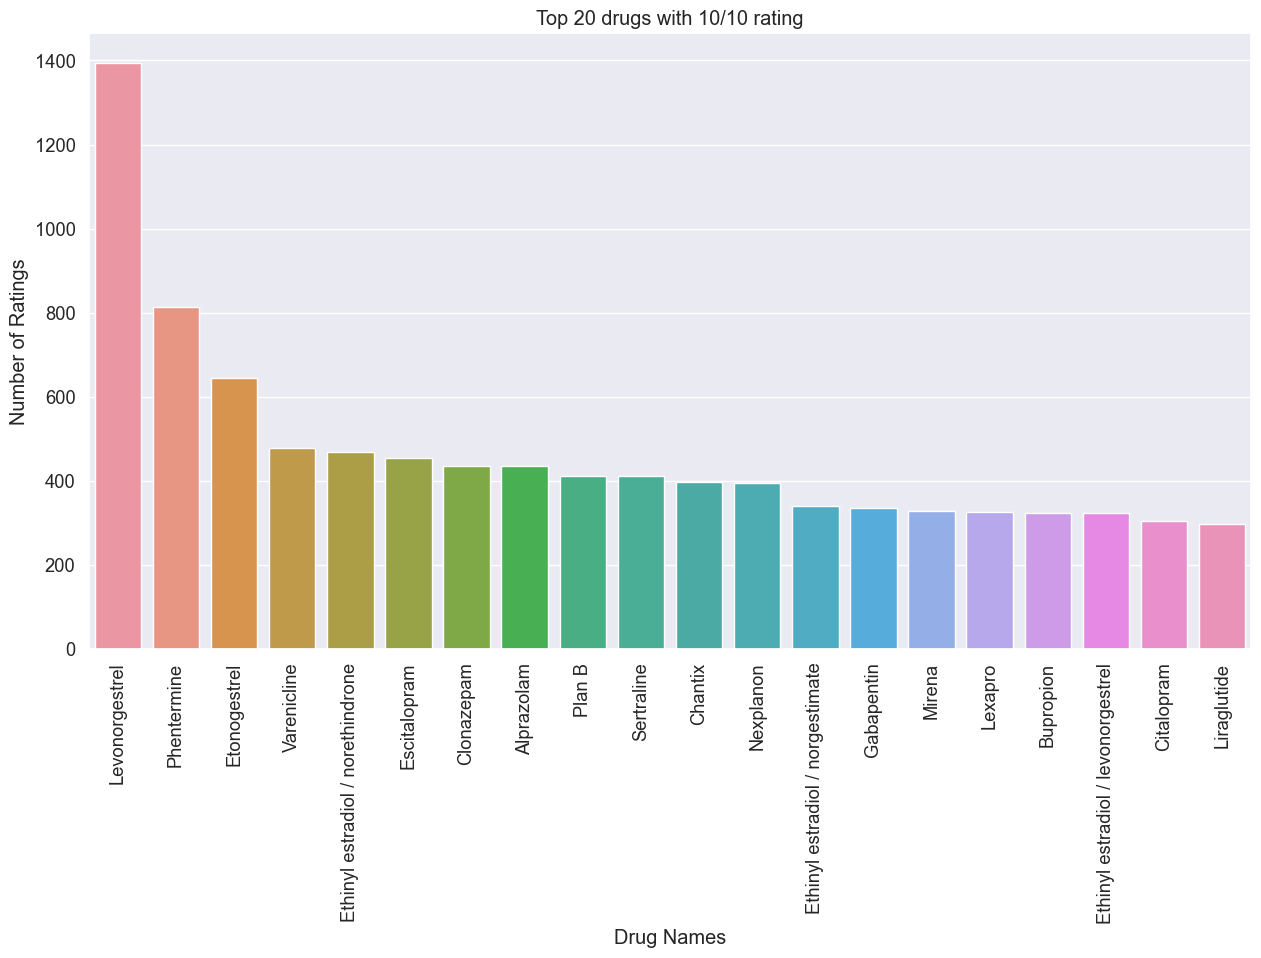

In [20]:
# This barplot shows the top 20 drugs with the 10/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

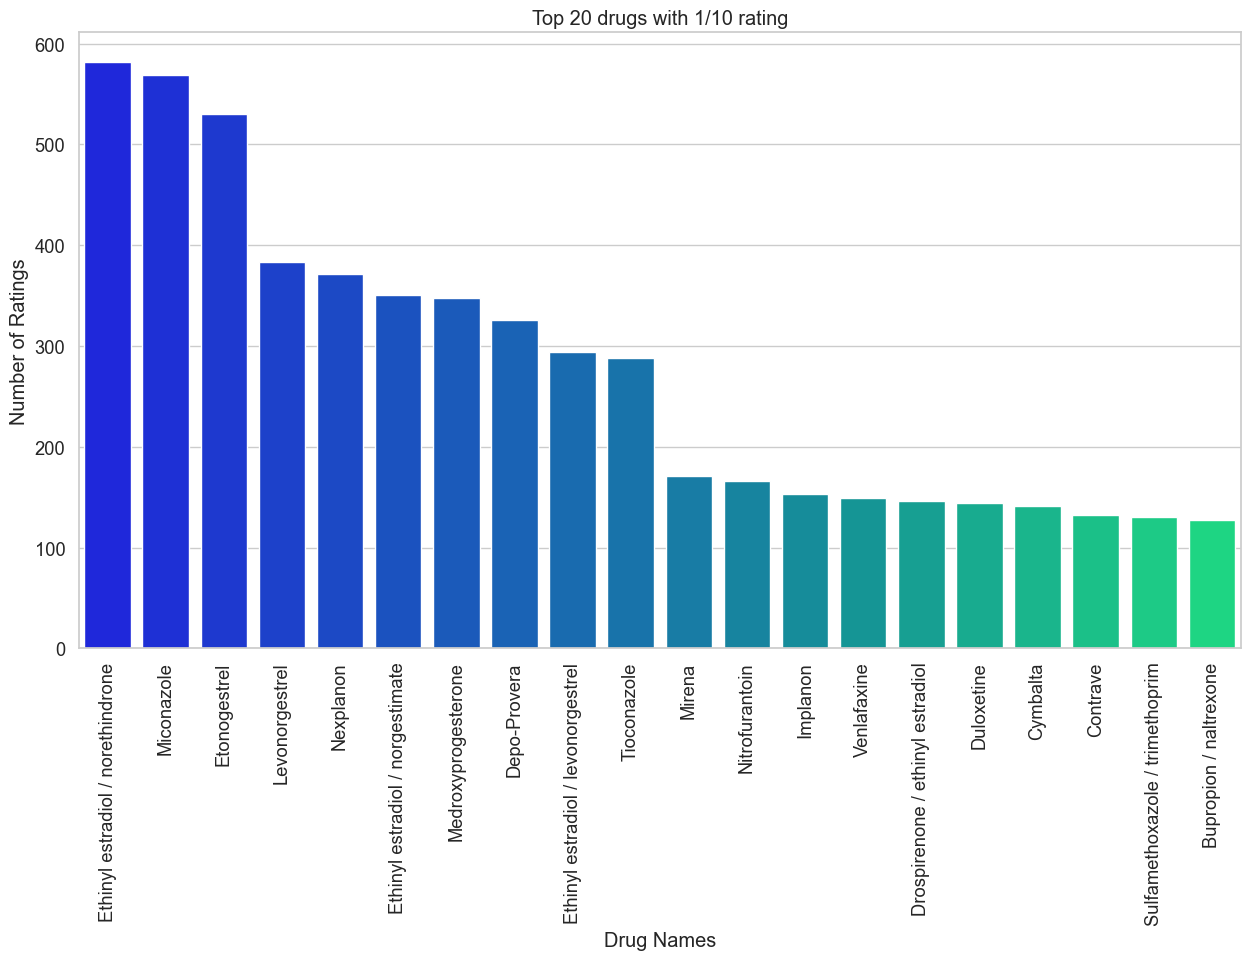

In [21]:
# This barplot shows the Top 20 drugs with the 1/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 1.0, 'Count of Ratings')

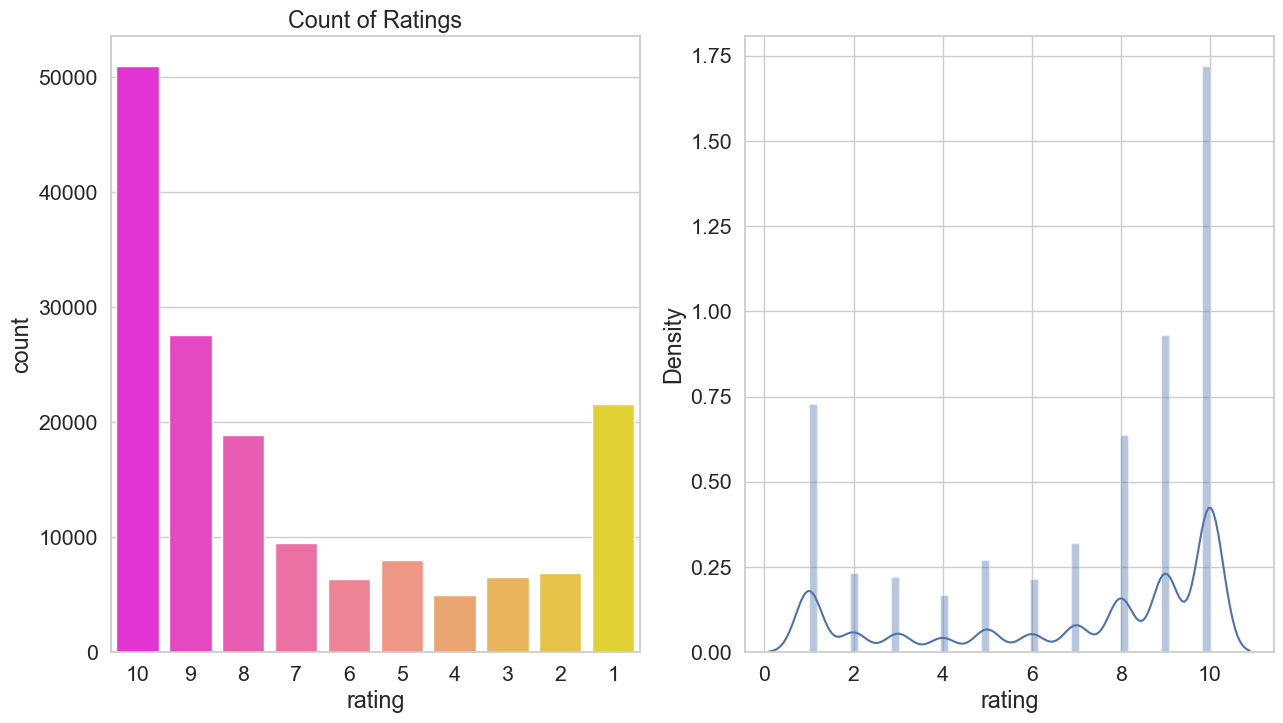

In [22]:

# Convert df_train['rating'] to a pandas Series object
rating_series = pd.Series(data['rating'])

# Plot the countplot
sns.set(font_scale=1.4, style='whitegrid')
fig, ax = plt.subplots(1, 2)
sns_1 = sns.countplot(x=rating_series, palette='spring', order=list(range(10, 0, -1)), ax=ax[0])
sns_2 = sns.distplot(rating_series, ax=ax[1])
sns_1.set_title('Count of Ratings')


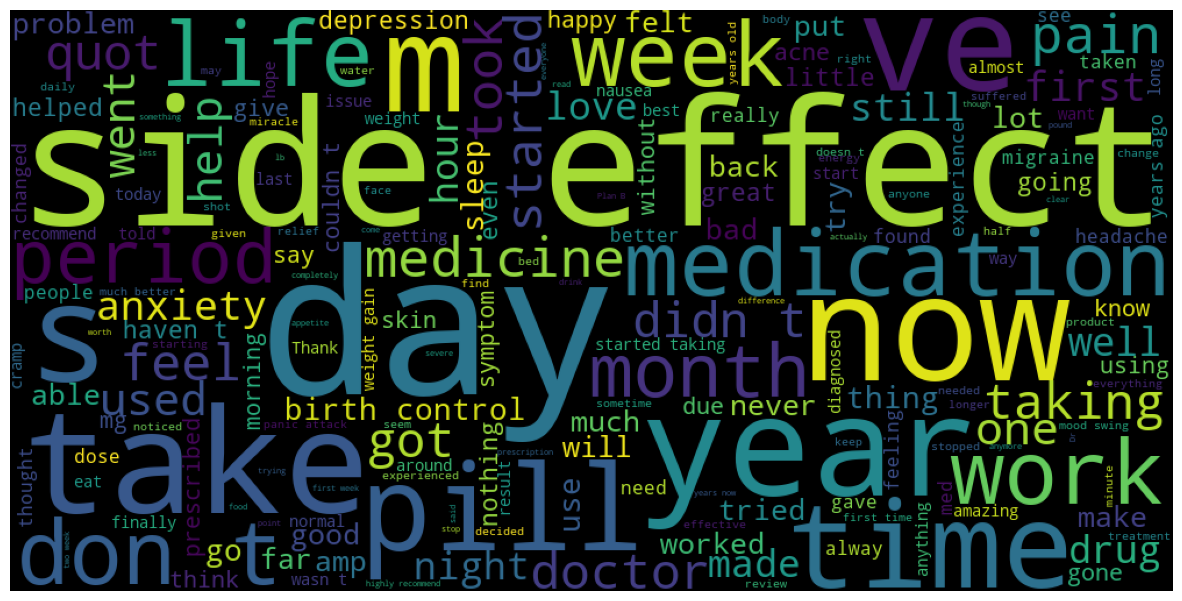

In [23]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = data.loc[data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

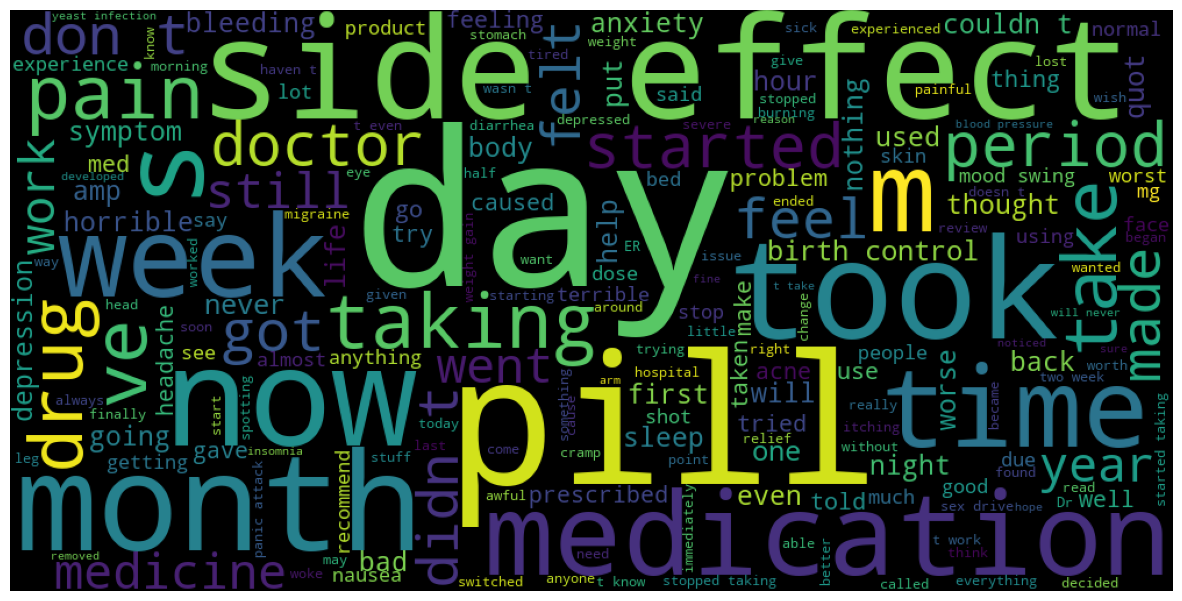

In [24]:
# Word cloud of the reviews with rating equal to 1
df_rate_one = data.loc[data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

In [25]:
data['rating'].value_counts()

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

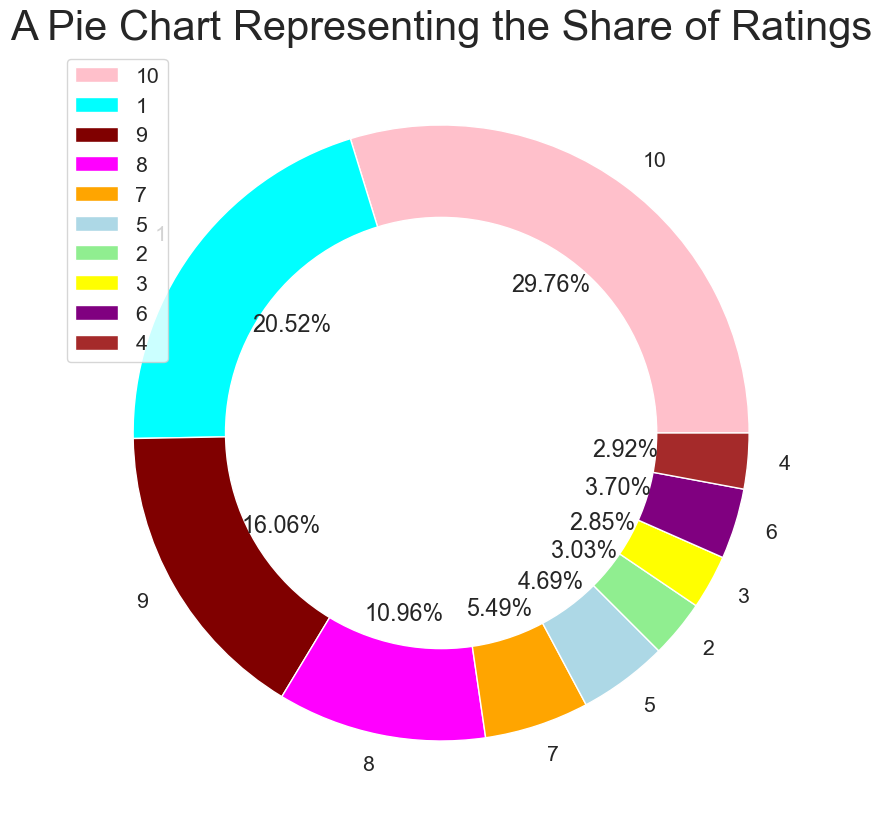

In [26]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 6931,6513,8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow','purple','brown']
labels = "10", "1", "9", "8", "7", "5","2","3", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [27]:

# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    121222
0.0     40075
Name: Review_Sentiment, dtype: int64

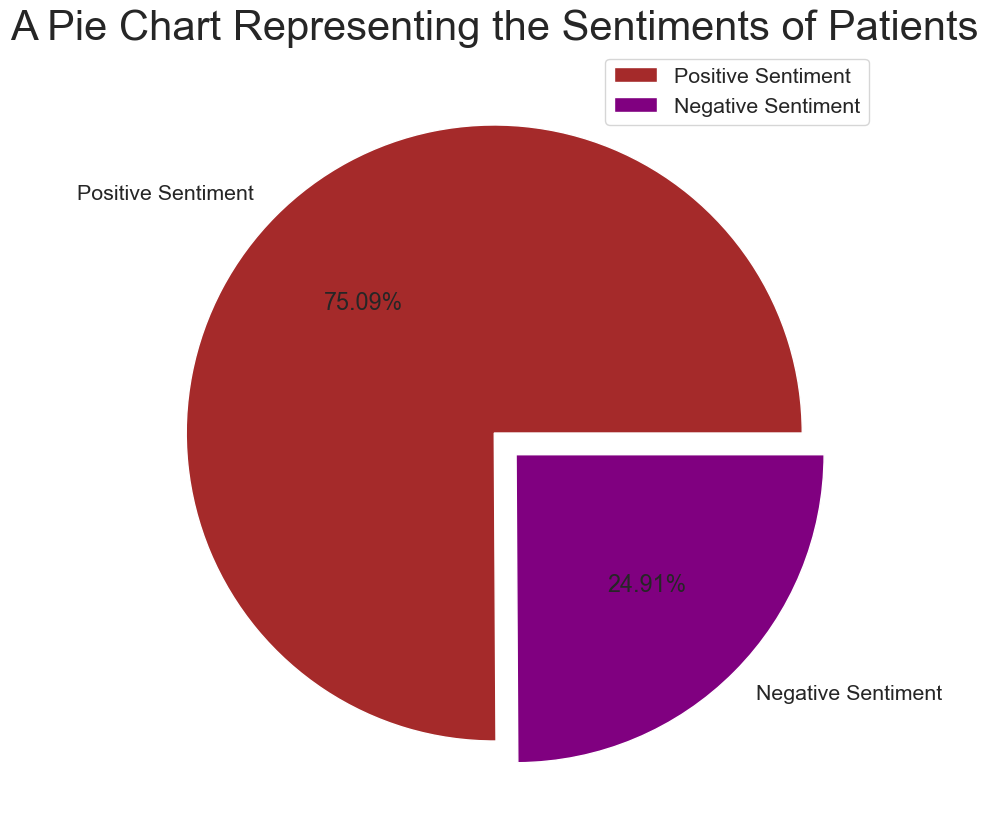

In [28]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['brown', 'purple']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

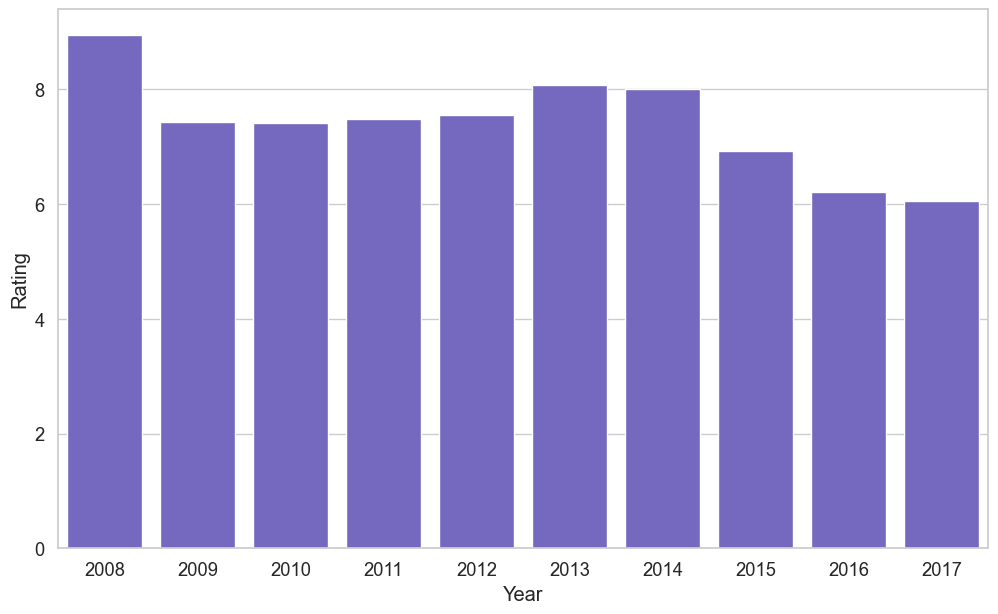

In [29]:
# This barplot shows the mean rating per year

mean_rating = dict(data.groupby(data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'slateblue');
sns_.set_xlabel('Year')
sns_.set_ylabel('Rating');

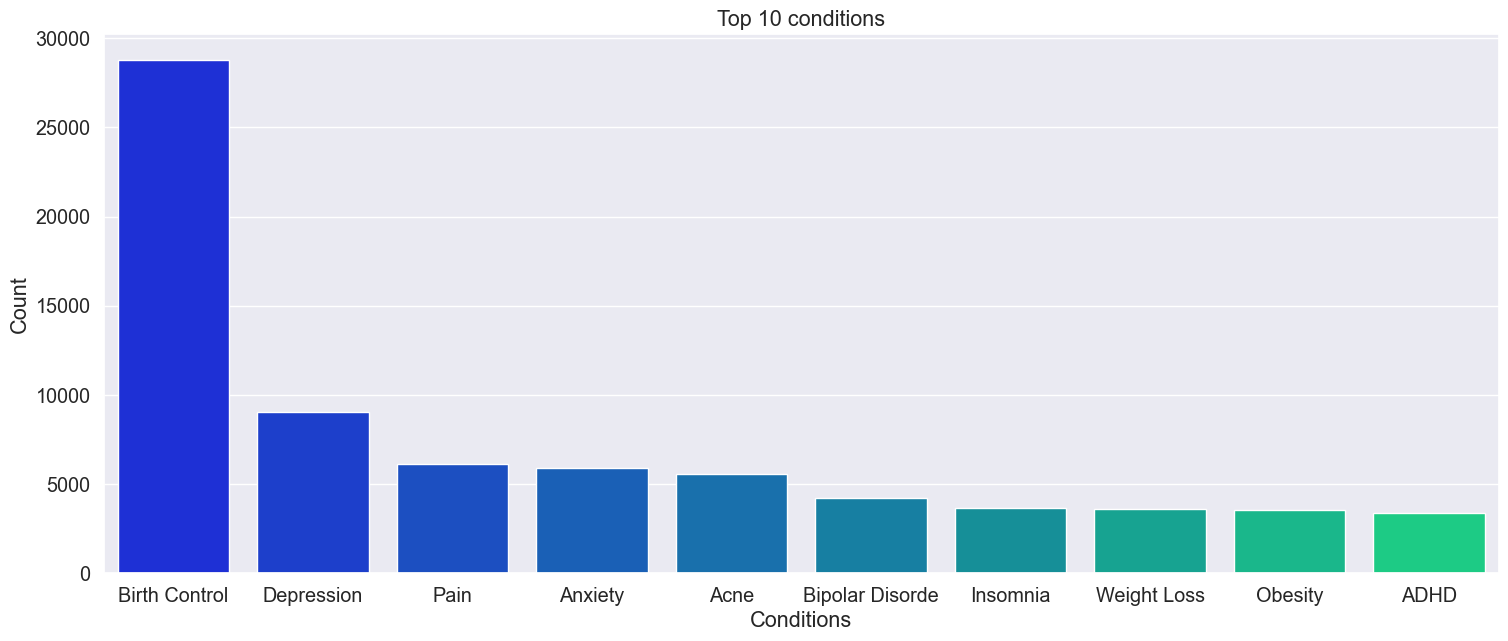

In [30]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

<Axes: xlabel='usefulcount', ylabel='Density'>

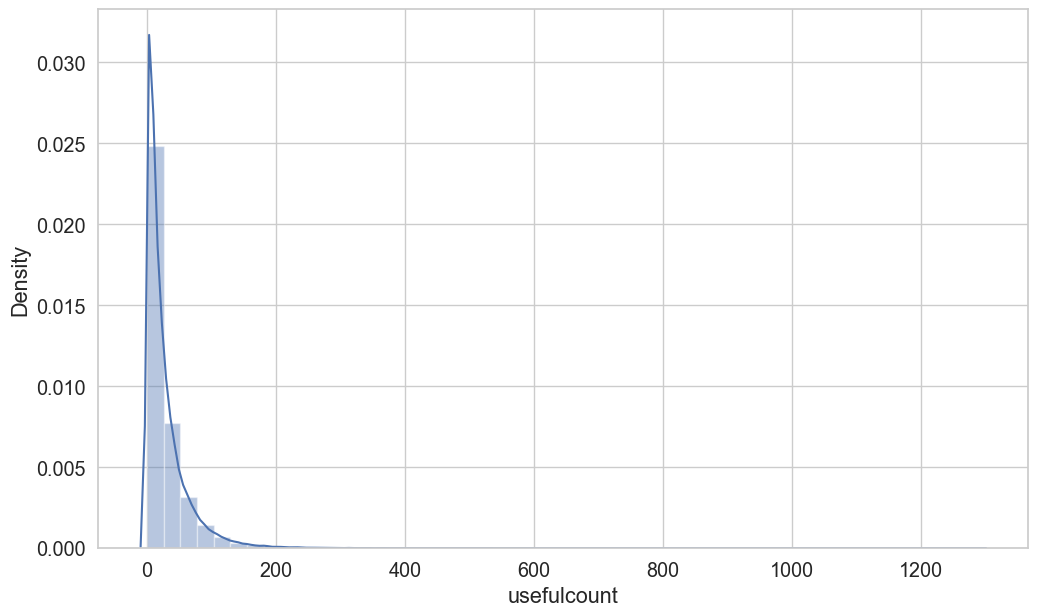

In [31]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(data['usefulcount'].dropna())

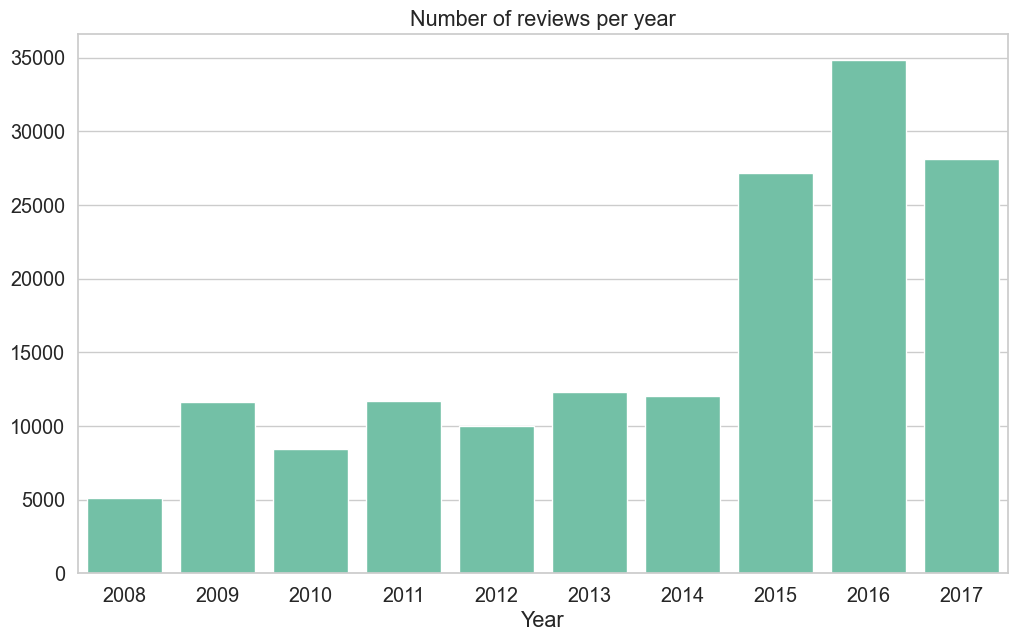

In [32]:
# This barplot shows the number of reviews per year
df = data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

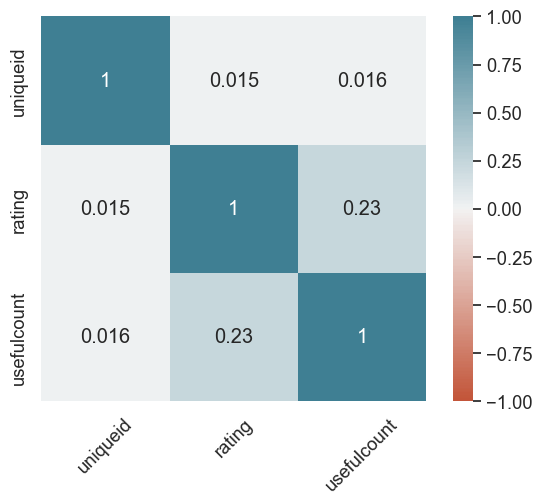

In [33]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [34]:
#Accessing once again five rows of our dataset
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,Review_Sentiment
0,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1.0
1,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1.0
2,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1.0
3,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0.0
4,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,1.0


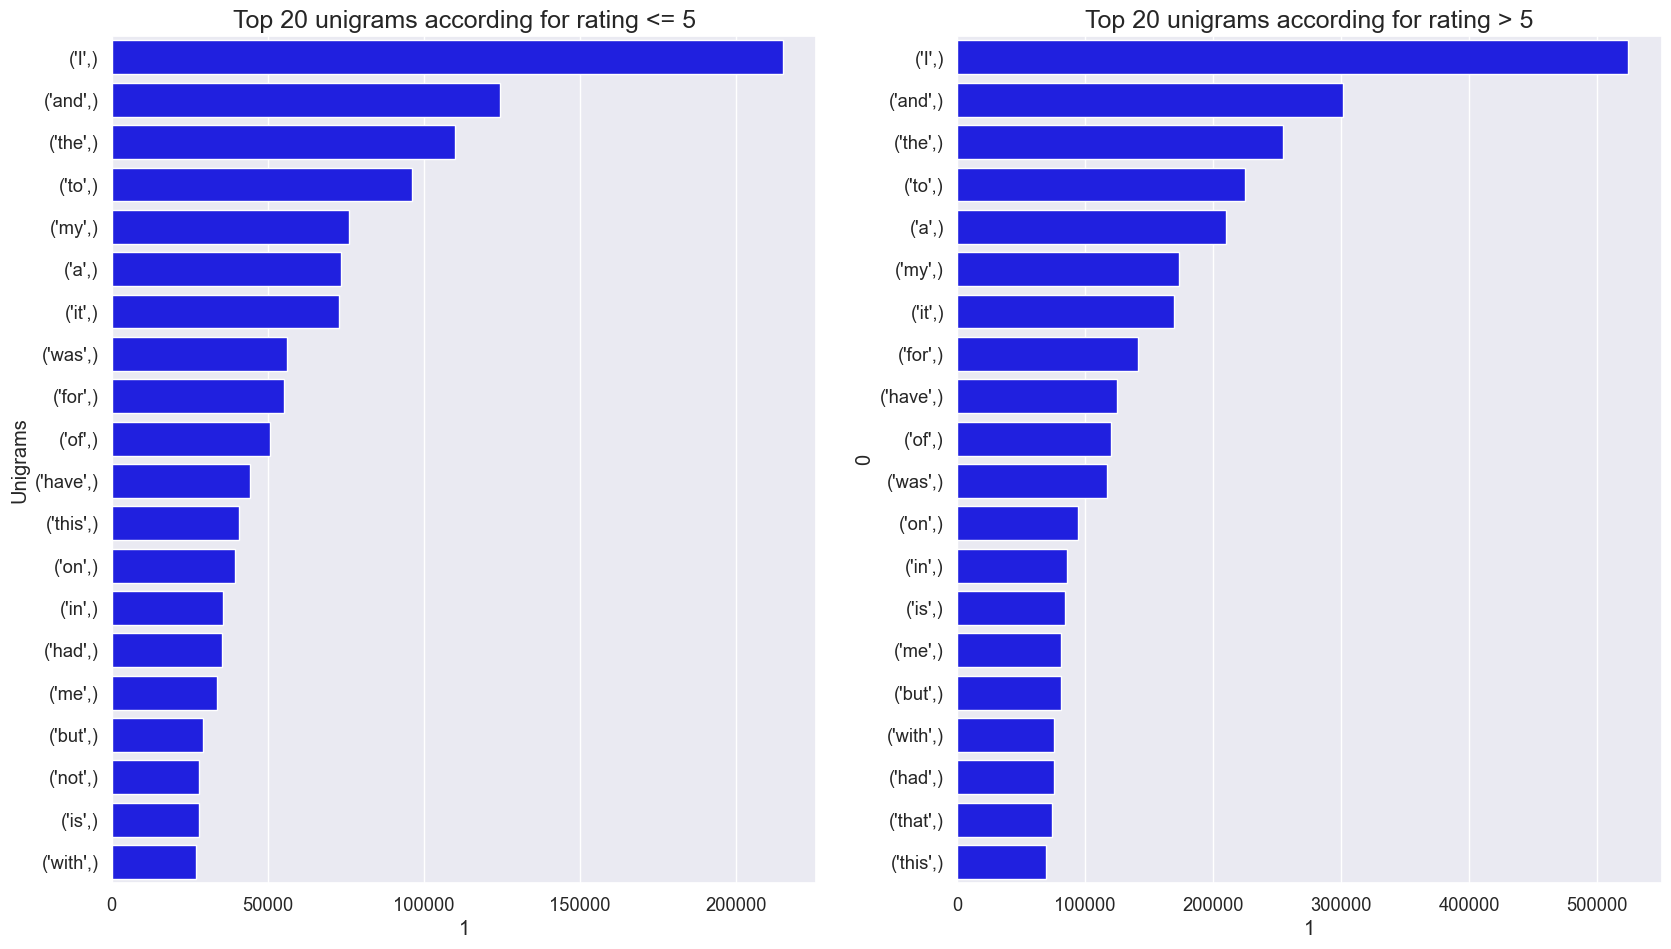

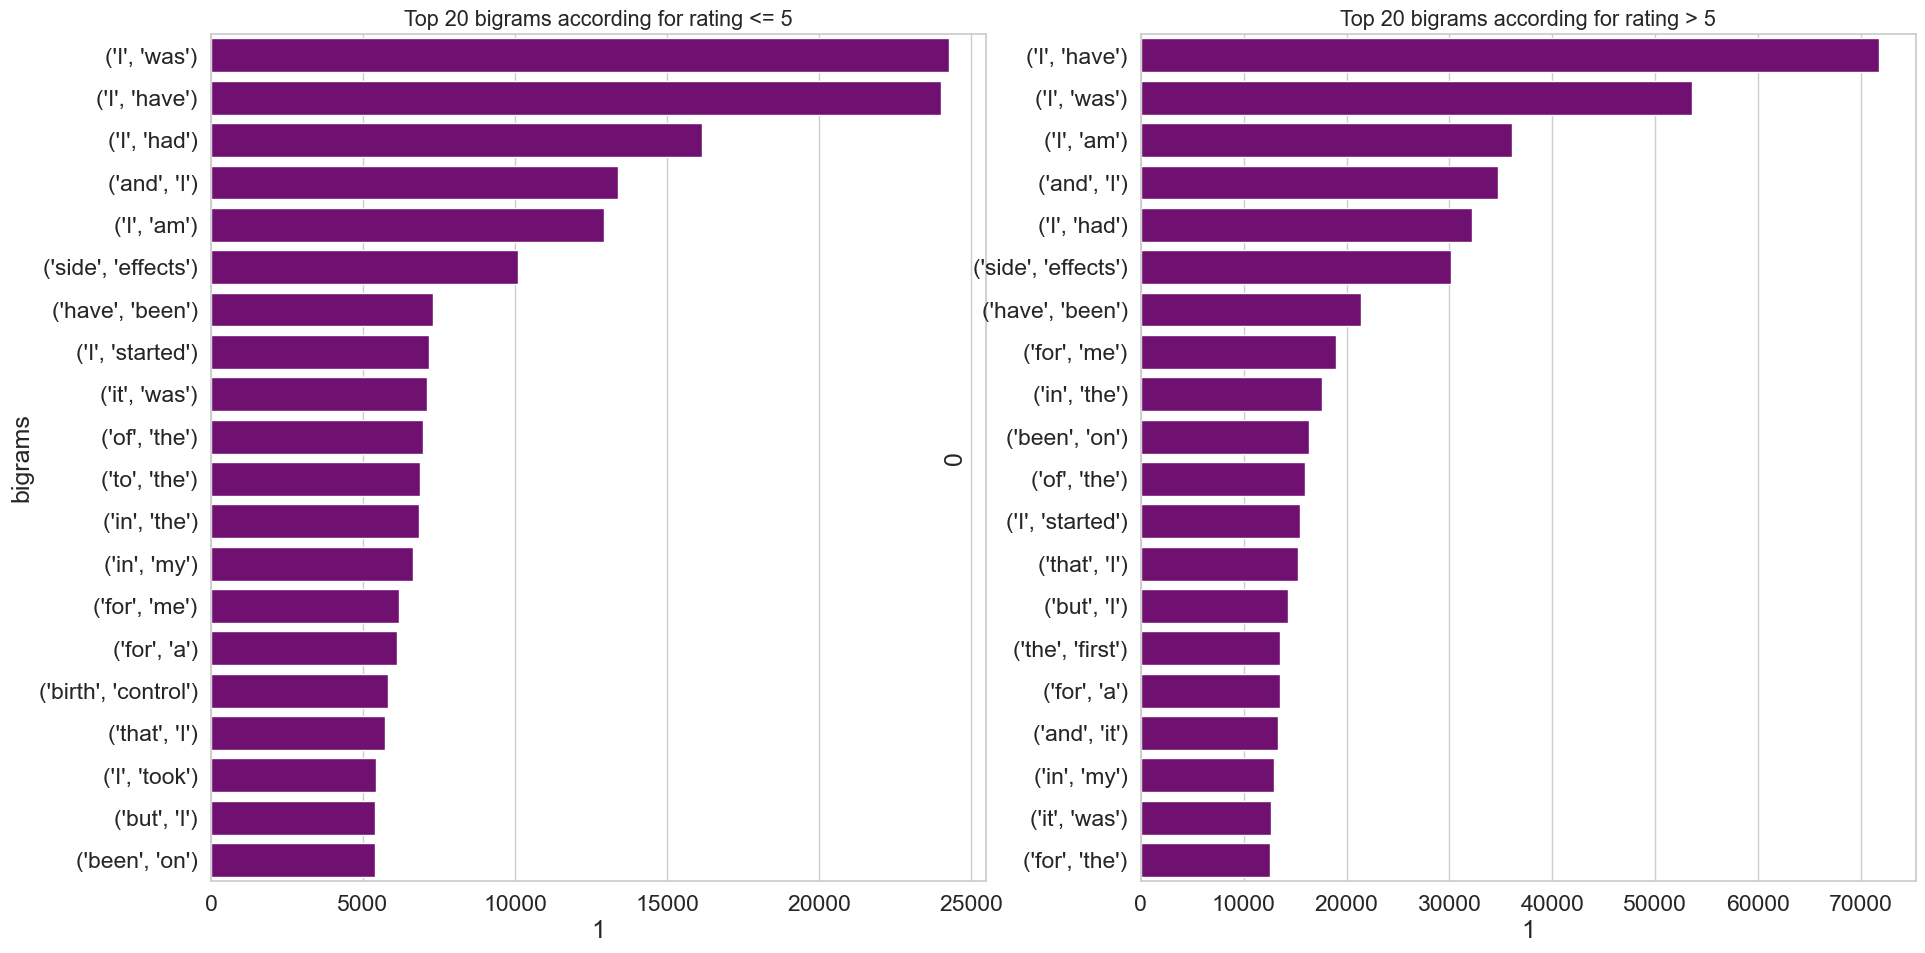

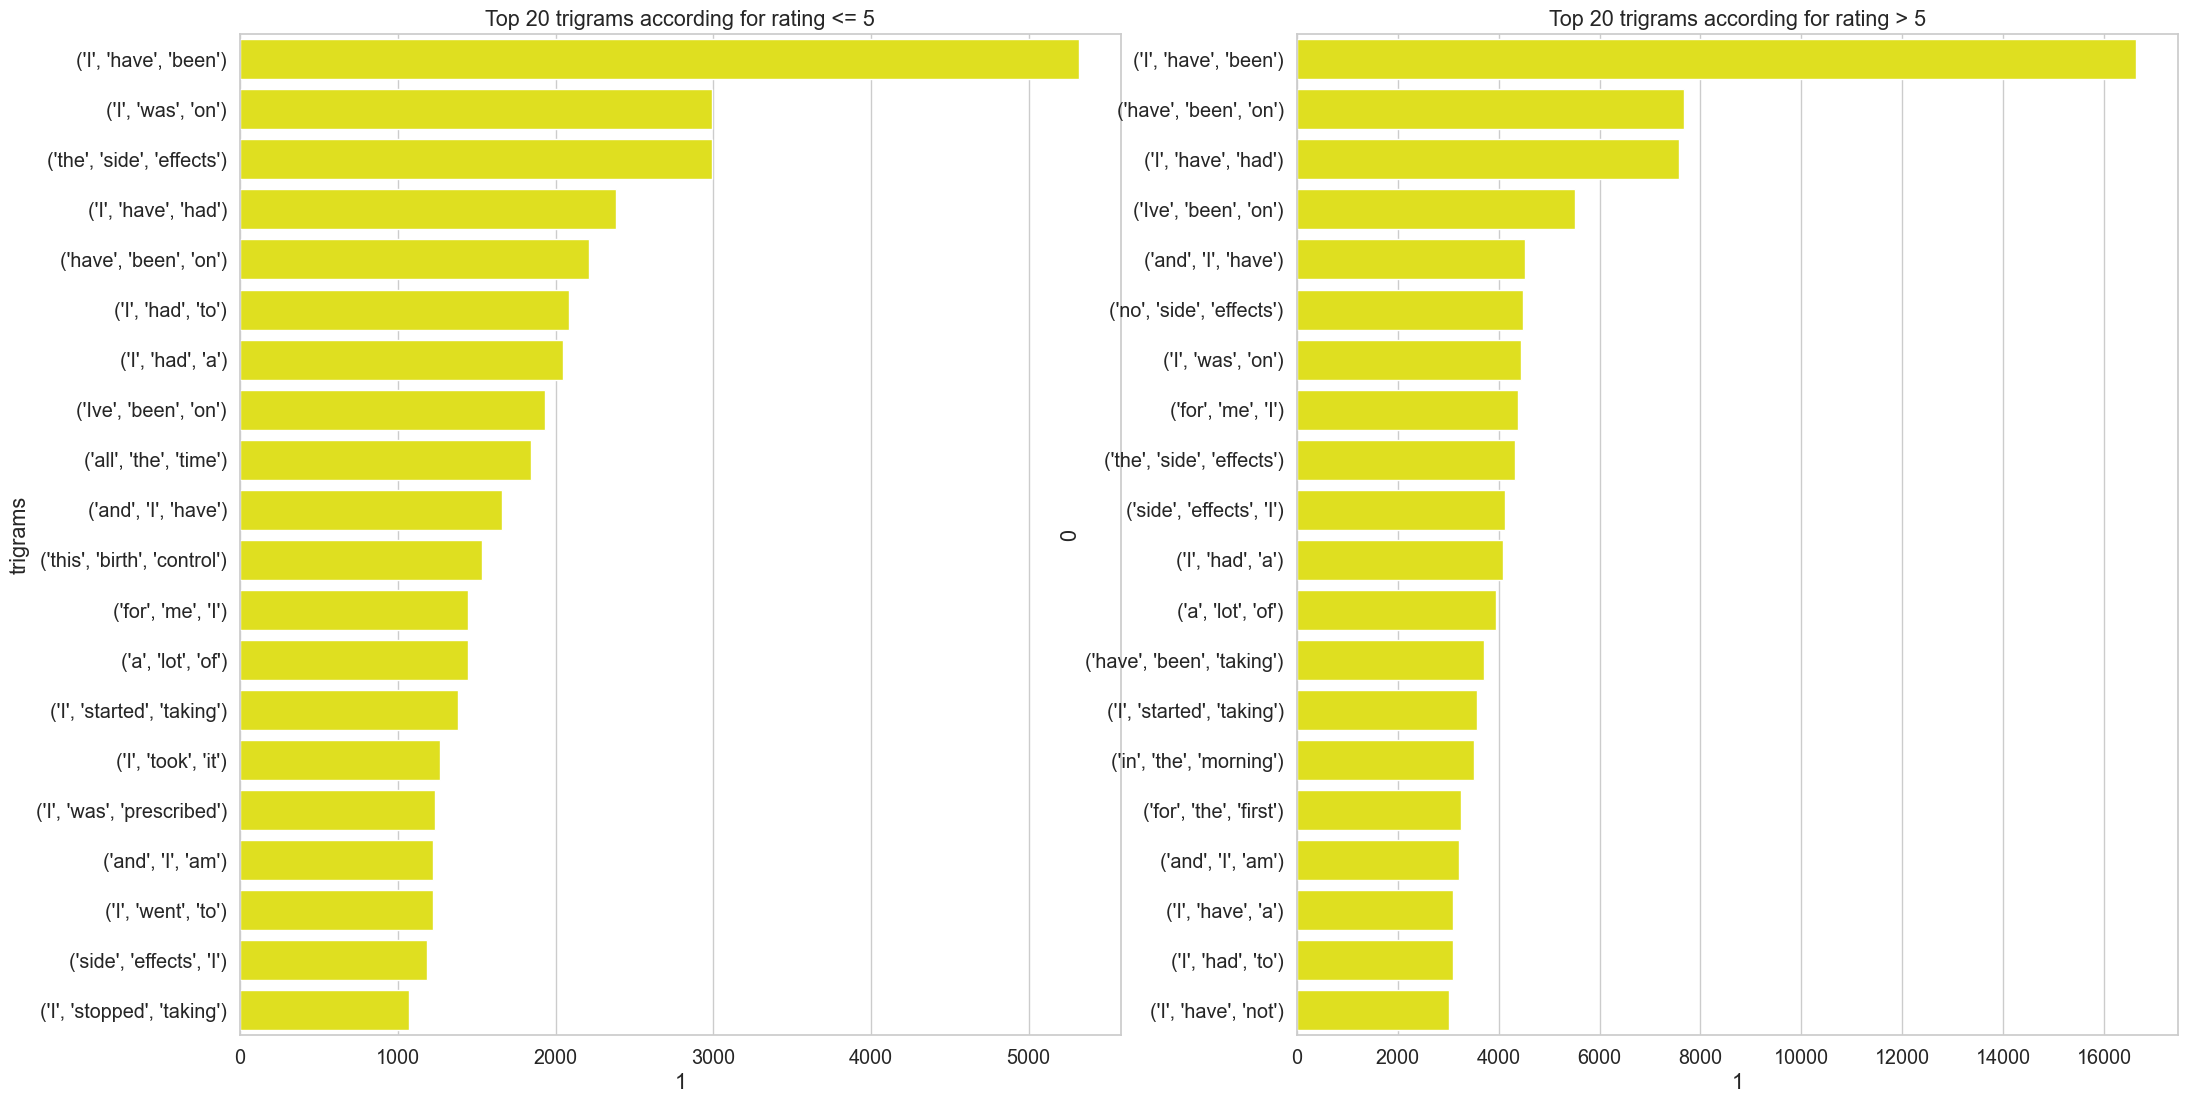

In [35]:
# Top 20 unigrams according to the rating
df_ = data[['rating', 'review']]
df_['review'] = data['review'].str.replace("&#039;", "")
df_['review'] = df_['review'].str.replace(r'[^\w\d\s]',' ')

df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])

token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

unigrams_5 = ngrams(token_review_5, 1)
unigrams_10 = ngrams(token_review_10, 1)

frequency_5 = Counter(unigrams_5)
frequency_10 = Counter(unigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [20,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'blue', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'blue', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 unigrams according for rating <= 5")
sns_10.set_title("Top 20 unigrams according for rating > 5")
sns_5.set_ylabel("Unigrams");

#############
# Top 20 bigrams according to the rating
bigrams_5 = ngrams(token_review_5, 2)
bigrams_10 = ngrams(token_review_10, 2)

frequency_5 = Counter(bigrams_5)
frequency_10 = Counter(bigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'purple', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'purple', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 bigrams according for rating <= 5")
sns_10.set_title("Top 20 bigrams according for rating > 5")
sns_5.set_ylabel("bigrams");

#################
# Top 20 trigrams according to the rating
trigrams_5 = ngrams(token_review_5, 3)
trigrams_10 = ngrams(token_review_10, 3)

frequency_5 = Counter(trigrams_5)
frequency_10 = Counter(trigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'yellow', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'yellow', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 trigrams according for rating <= 5")
sns_10.set_title("Top 20 trigrams according for rating > 5")
sns_5.set_ylabel("trigrams");

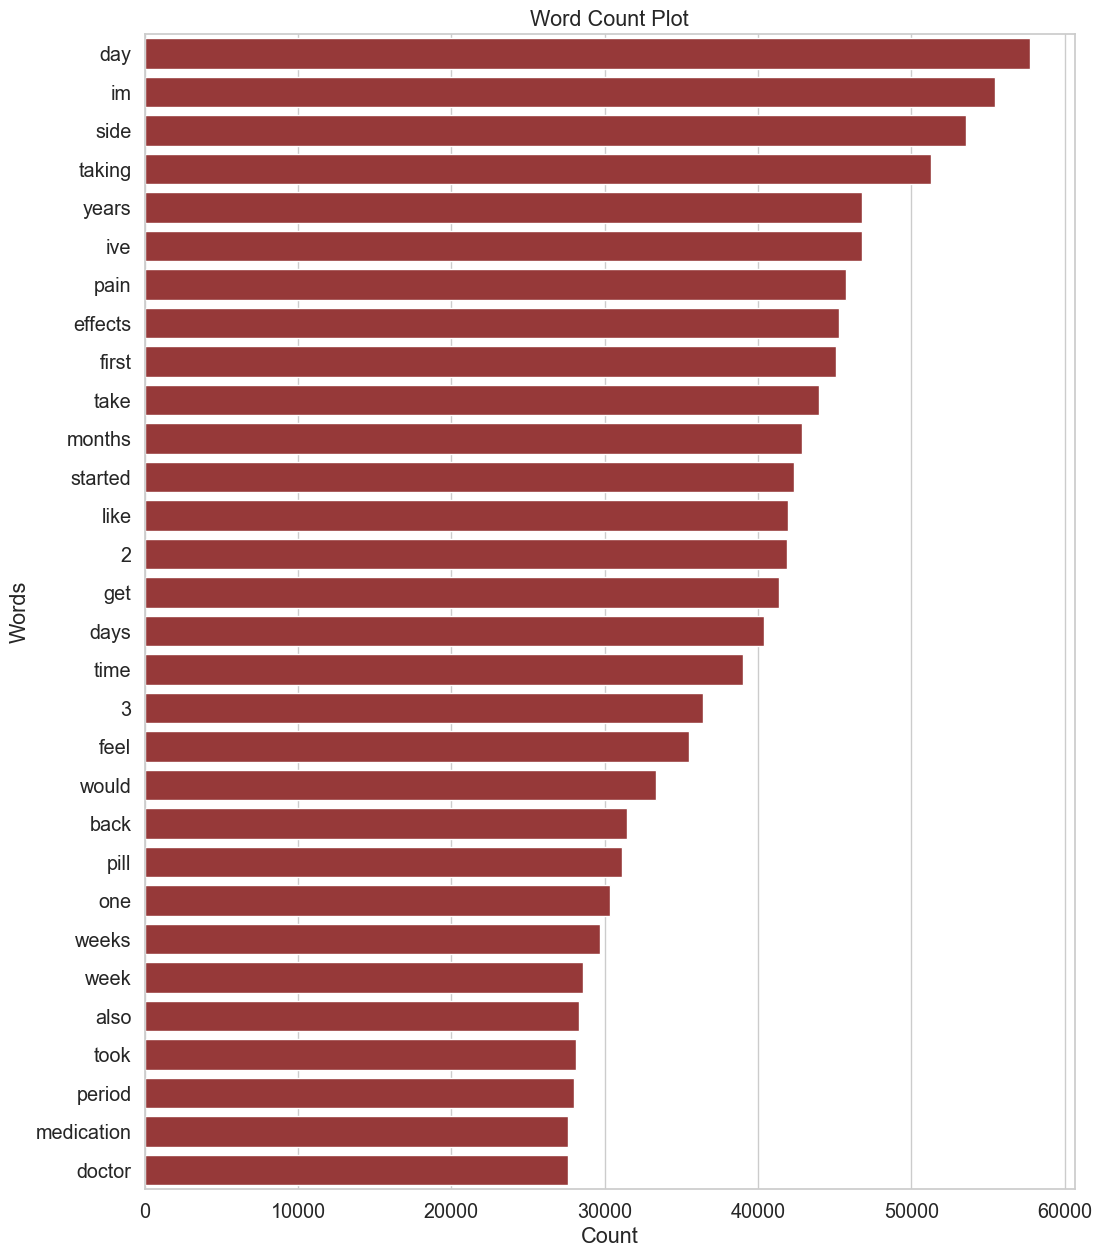

In [36]:
# Word count plot

# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
df_['review'] = df_['review'].str.lower()
df_['review_1'] = df_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df_review = " ".join(df_['review_1'])
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df[1], y = df[0], color = 'brown')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

In [37]:
# Giving the Sentiment according to the ratings
data['sentiment_rate'] = data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [38]:
#cleaning reviews
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [39]:
#creating new column called review clean to keep cleaned reviews
data['review_clean'] = review_clean(data['review'])

In [40]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [41]:
data['review_clean'][0: 20]

0     im 21 years old recently found might pcos have...
1     shot 11 years month ago never 1 period even sp...
2     ive four shots point birth control pills years...
3     total 3 shots got first one leaving hospital g...
4     im 18 got heavy bleeding ive always heard bc m...
5     im 19 heavy painful periods since forever got ...
6     im 30 year old woman got shot august 9th bleed...
7     im 17 years old got shot august 2015 personall...
8     first month awesome absolutely wonderful start...
9     started depo shot year ago originally bled 3 w...
10    im 17 went depo heavy bleeding like heavy woul...
11    1st shot sept 2nd nonstop bleeding since side ...
12    got shot 6 week post partum nurse seen highly ...
13    one injection june 2012 seeing gp wanting try ...
14    depo provera ages 15 18 pros pregnant periods ...
15    got shot 2 half months ago stopped bleeding sp...
16    got depo shot later part september october did...
17    hyperplasia last year well endometriosis s

In [42]:
# Separating the day, month and year from the Date
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [43]:
#Displaying dataset after separating date column
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,Review_Sentiment,sentiment_rate,review_clean,day,month,year
0,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1.0,1,im 21 years old recently found might pcos have...,27,10,2015
1,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1.0,1,shot 11 years month ago never 1 period even sp...,27,10,2015
2,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1.0,1,ive four shots point birth control pills years...,26,10,2015
3,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0.0,0,total 3 shots got first one leaving hospital g...,25,10,2015
4,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,1.0,0,im 18 got heavy bleeding ive always heard bc m...,22,10,2015


In [44]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [45]:
data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,Review_Sentiment,sentiment_rate,review_clean,day,month,year
0,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1.0,1,im 21 years old recently found might pcos have...,27,10,2015
1,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1.0,1,shot 11 years month ago never 1 period even sp...,27,10,2015
2,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1.0,1,ive four shots point birth control pills years...,26,10,2015
3,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0.0,0,total 3 shots got first one leaving hospital g...,25,10,2015
4,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,1.0,0,im 18 got heavy bleeding ive always heard bc m...,22,10,2015


In [46]:
data['sentiment'] = sentiment(data['review'])

In [47]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [48]:
np.corrcoef(data['sentiment'], data['rating'])

array([[1.        , 0.34853855],
       [0.34853855, 1.        ]])

In [49]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [50]:
np.corrcoef(data['sentiment_clean_ss'], data['rating'])

array([[1.        , 0.34644131],
       [0.34644131, 1.        ]])

In [51]:
data['condition'].value_counts().head(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

In [52]:
data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount,Review_Sentiment,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1.0,1,im 21 years old recently found might pcos have...,27,10,2015,0.175357,0.169481,im 21 years old and recently found out i might...,0.175357
1,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1.0,1,shot 11 years month ago never 1 period even sp...,27,10,2015,-0.210000,-0.075000,i have been on the shot 11 years and until a m...,-0.210000
2,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1.0,1,ive four shots point birth control pills years...,26,10,2015,-0.022500,-0.041667,ive had four shots at this point i was on birt...,-0.033333
3,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0.0,0,total 3 shots got first one leaving hospital g...,25,10,2015,0.044872,0.053030,i had a total of 3 shots i got my first one be...,0.044872
4,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,1.0,0,im 18 got heavy bleeding ive always heard bc m...,22,10,2015,-0.056692,-0.065025,im 18 and got this for heavy bleeding ive alwa...,-0.065025
5,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,2015-10-21,2,1.0,0,im 19 heavy painful periods since forever got ...,21,10,2015,0.030995,-0.013636,im 19 and have been having heavy and painful p...,0.026923
6,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,2015-10-21,5,0.0,0,im 30 year old woman got shot august 9th bleed...,21,10,2015,0.265309,0.291667,im a 30 year old woman i got the shot on augus...,0.265309
7,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,2015-10-20,2,1.0,1,im 17 years old got shot august 2015 personall...,20,10,2015,-0.047222,-0.042857,im 17 years old and i got shot in august 2015 ...,-0.047222
8,12,Medroxyprogesterone,Abnormal Uterine Bleeding,"""First month was awesome. Absolutely wonderful...",3,2015-10-18,7,0.0,0,first month awesome absolutely wonderful start...,18,10,2015,0.190625,0.190625,first month was awesome absolutely wonderful t...,0.190625
9,14,Medroxyprogesterone,Birth Control,"""I started the Depo shot a year ago. Originall...",2,2015-10-17,7,0.0,0,started depo shot year ago originally bled 3 w...,17,10,2015,-0.036905,-0.000661,i started the depo shot a year ago originally ...,-0.036905


# Data Prepossessing

In [53]:
# 3 Feature engineering

#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] =data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [54]:
data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'Review_Sentiment', 'sentiment_rate', 'review_clean',
       'day', 'month', 'year', 'sentiment', 'sentiment_clean',
       'review_clean_ss', 'sentiment_clean_ss', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

In [55]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [56]:
#modelling
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [57]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulcount', 'sentiment', 'day', 'month', 'year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['sentiment_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (112907, 15)
The Test set size  (48390, 15)


In [58]:
#Model - II XGBClassifier
# Training Model - II
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_2)

[06:17:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator", "num_leaves" } are not used.

The Accuracy of the model is :  0.7643521388716678
The confusion Matrix is 


array([[ 6032,  8529],
       [ 2874, 30955]], dtype=int64)

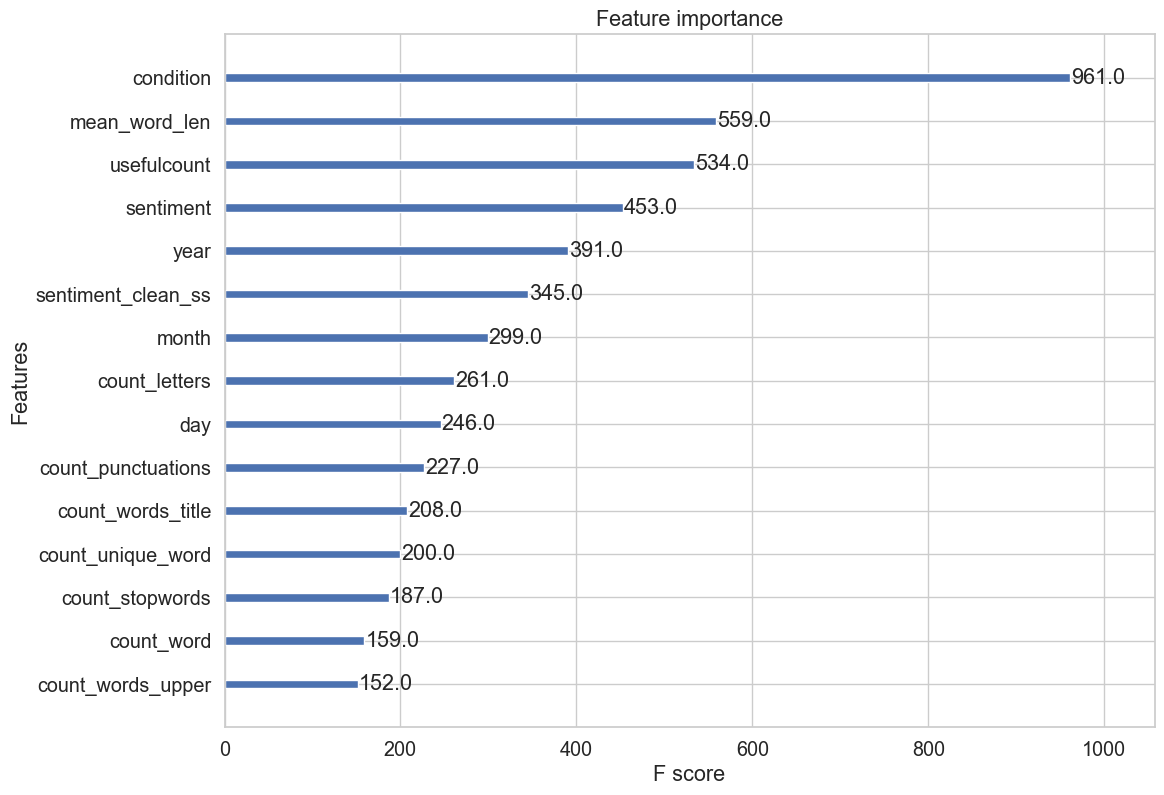

In [59]:
# Feature Importance Plot using XGBClassifier
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

# Model Training

In [60]:
#Model - III CatBoostClassifier
# Training Model - III
cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5)

model_cat = cat_clf.fit(X_train, y_train);

# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_3)

0:	learn: 0.5595943	total: 175ms	remaining: 29m 11s
1:	learn: 0.5238998	total: 190ms	remaining: 15m 49s
2:	learn: 0.5138289	total: 203ms	remaining: 11m 16s
3:	learn: 0.5081732	total: 215ms	remaining: 8m 57s
4:	learn: 0.5050579	total: 228ms	remaining: 7m 34s
5:	learn: 0.5033024	total: 240ms	remaining: 6m 39s
6:	learn: 0.5020684	total: 255ms	remaining: 6m 4s
7:	learn: 0.5001881	total: 270ms	remaining: 5m 37s
8:	learn: 0.4989212	total: 284ms	remaining: 5m 15s
9:	learn: 0.4978372	total: 298ms	remaining: 4m 57s
10:	learn: 0.4964465	total: 311ms	remaining: 4m 42s
11:	learn: 0.4955842	total: 324ms	remaining: 4m 29s
12:	learn: 0.4942672	total: 338ms	remaining: 4m 19s
13:	learn: 0.4938363	total: 353ms	remaining: 4m 11s
14:	learn: 0.4912781	total: 366ms	remaining: 4m 3s
15:	learn: 0.4905304	total: 380ms	remaining: 3m 57s
16:	learn: 0.4897031	total: 392ms	remaining: 3m 50s
17:	learn: 0.4889507	total: 403ms	remaining: 3m 43s
18:	learn: 0.4886515	total: 414ms	remaining: 3m 37s
19:	learn: 0.4881159	

167:	learn: 0.4257411	total: 2.24s	remaining: 2m 11s
168:	learn: 0.4253328	total: 2.26s	remaining: 2m 11s
169:	learn: 0.4249288	total: 2.27s	remaining: 2m 11s
170:	learn: 0.4246592	total: 2.28s	remaining: 2m 11s
171:	learn: 0.4243731	total: 2.29s	remaining: 2m 10s
172:	learn: 0.4239683	total: 2.3s	remaining: 2m 10s
173:	learn: 0.4236090	total: 2.32s	remaining: 2m 10s
174:	learn: 0.4233386	total: 2.33s	remaining: 2m 10s
175:	learn: 0.4230349	total: 2.34s	remaining: 2m 10s
176:	learn: 0.4226358	total: 2.35s	remaining: 2m 10s
177:	learn: 0.4222806	total: 2.36s	remaining: 2m 10s
178:	learn: 0.4219573	total: 2.38s	remaining: 2m 10s
179:	learn: 0.4216431	total: 2.39s	remaining: 2m 10s
180:	learn: 0.4212670	total: 2.4s	remaining: 2m 10s
181:	learn: 0.4209825	total: 2.41s	remaining: 2m 10s
182:	learn: 0.4208296	total: 2.42s	remaining: 2m 9s
183:	learn: 0.4205091	total: 2.44s	remaining: 2m 9s
184:	learn: 0.4201827	total: 2.45s	remaining: 2m 9s
185:	learn: 0.4199261	total: 2.46s	remaining: 2m 9s

340:	learn: 0.3782122	total: 4.52s	remaining: 2m 7s
341:	learn: 0.3779739	total: 4.53s	remaining: 2m 7s
342:	learn: 0.3778414	total: 4.54s	remaining: 2m 7s
343:	learn: 0.3776315	total: 4.55s	remaining: 2m 7s
344:	learn: 0.3774729	total: 4.57s	remaining: 2m 7s
345:	learn: 0.3772185	total: 4.58s	remaining: 2m 7s
346:	learn: 0.3769194	total: 4.59s	remaining: 2m 7s
347:	learn: 0.3767421	total: 4.6s	remaining: 2m 7s
348:	learn: 0.3765206	total: 4.61s	remaining: 2m 7s
349:	learn: 0.3761981	total: 4.63s	remaining: 2m 7s
350:	learn: 0.3760027	total: 4.64s	remaining: 2m 7s
351:	learn: 0.3757260	total: 4.65s	remaining: 2m 7s
352:	learn: 0.3754983	total: 4.66s	remaining: 2m 7s
353:	learn: 0.3752729	total: 4.67s	remaining: 2m 7s
354:	learn: 0.3749507	total: 4.69s	remaining: 2m 7s
355:	learn: 0.3746158	total: 4.7s	remaining: 2m 7s
356:	learn: 0.3743762	total: 4.71s	remaining: 2m 7s
357:	learn: 0.3742803	total: 4.72s	remaining: 2m 7s
358:	learn: 0.3741255	total: 4.74s	remaining: 2m 7s
359:	learn: 0.

514:	learn: 0.3407234	total: 6.64s	remaining: 2m 2s
515:	learn: 0.3404948	total: 6.65s	remaining: 2m 2s
516:	learn: 0.3402791	total: 6.67s	remaining: 2m 2s
517:	learn: 0.3400611	total: 6.68s	remaining: 2m 2s
518:	learn: 0.3398228	total: 6.69s	remaining: 2m 2s
519:	learn: 0.3395818	total: 6.71s	remaining: 2m 2s
520:	learn: 0.3393815	total: 6.72s	remaining: 2m 2s
521:	learn: 0.3391999	total: 6.73s	remaining: 2m 2s
522:	learn: 0.3390186	total: 6.74s	remaining: 2m 2s
523:	learn: 0.3388268	total: 6.75s	remaining: 2m 2s
524:	learn: 0.3386518	total: 6.76s	remaining: 2m 2s
525:	learn: 0.3384218	total: 6.78s	remaining: 2m 2s
526:	learn: 0.3381807	total: 6.79s	remaining: 2m 2s
527:	learn: 0.3379163	total: 6.8s	remaining: 2m 2s
528:	learn: 0.3377304	total: 6.81s	remaining: 2m 1s
529:	learn: 0.3374914	total: 6.83s	remaining: 2m 1s
530:	learn: 0.3373369	total: 6.84s	remaining: 2m 1s
531:	learn: 0.3371376	total: 6.85s	remaining: 2m 1s
532:	learn: 0.3369277	total: 6.86s	remaining: 2m 1s
533:	learn: 0

681:	learn: 0.3091224	total: 8.74s	remaining: 1m 59s
682:	learn: 0.3089437	total: 8.76s	remaining: 1m 59s
683:	learn: 0.3087694	total: 8.77s	remaining: 1m 59s
684:	learn: 0.3085435	total: 8.78s	remaining: 1m 59s
685:	learn: 0.3083924	total: 8.79s	remaining: 1m 59s
686:	learn: 0.3081029	total: 8.81s	remaining: 1m 59s
687:	learn: 0.3078772	total: 8.82s	remaining: 1m 59s
688:	learn: 0.3077906	total: 8.83s	remaining: 1m 59s
689:	learn: 0.3076298	total: 8.84s	remaining: 1m 59s
690:	learn: 0.3074077	total: 8.86s	remaining: 1m 59s
691:	learn: 0.3072477	total: 8.87s	remaining: 1m 59s
692:	learn: 0.3070967	total: 8.88s	remaining: 1m 59s
693:	learn: 0.3069607	total: 8.89s	remaining: 1m 59s
694:	learn: 0.3067986	total: 8.9s	remaining: 1m 59s
695:	learn: 0.3065993	total: 8.92s	remaining: 1m 59s
696:	learn: 0.3063855	total: 8.93s	remaining: 1m 59s
697:	learn: 0.3061999	total: 8.94s	remaining: 1m 59s
698:	learn: 0.3060659	total: 8.95s	remaining: 1m 59s
699:	learn: 0.3058329	total: 8.97s	remaining: 1

848:	learn: 0.2804632	total: 10.9s	remaining: 1m 57s
849:	learn: 0.2803685	total: 10.9s	remaining: 1m 57s
850:	learn: 0.2801744	total: 10.9s	remaining: 1m 57s
851:	learn: 0.2800080	total: 10.9s	remaining: 1m 57s
852:	learn: 0.2798859	total: 10.9s	remaining: 1m 57s
853:	learn: 0.2797136	total: 10.9s	remaining: 1m 57s
854:	learn: 0.2795908	total: 11s	remaining: 1m 57s
855:	learn: 0.2794723	total: 11s	remaining: 1m 57s
856:	learn: 0.2793381	total: 11s	remaining: 1m 57s
857:	learn: 0.2792014	total: 11s	remaining: 1m 57s
858:	learn: 0.2790768	total: 11s	remaining: 1m 57s
859:	learn: 0.2789503	total: 11s	remaining: 1m 57s
860:	learn: 0.2787947	total: 11s	remaining: 1m 57s
861:	learn: 0.2786745	total: 11s	remaining: 1m 57s
862:	learn: 0.2785162	total: 11.1s	remaining: 1m 57s
863:	learn: 0.2783651	total: 11.1s	remaining: 1m 57s
864:	learn: 0.2781377	total: 11.1s	remaining: 1m 57s
865:	learn: 0.2779720	total: 11.1s	remaining: 1m 57s
866:	learn: 0.2778910	total: 11.1s	remaining: 1m 57s
867:	lear

1010:	learn: 0.2558487	total: 13s	remaining: 1m 55s
1011:	learn: 0.2556767	total: 13s	remaining: 1m 55s
1012:	learn: 0.2554881	total: 13s	remaining: 1m 55s
1013:	learn: 0.2553960	total: 13s	remaining: 1m 55s
1014:	learn: 0.2552223	total: 13.1s	remaining: 1m 55s
1015:	learn: 0.2550837	total: 13.1s	remaining: 1m 55s
1016:	learn: 0.2549695	total: 13.1s	remaining: 1m 55s
1017:	learn: 0.2548646	total: 13.1s	remaining: 1m 55s
1018:	learn: 0.2547018	total: 13.1s	remaining: 1m 55s
1019:	learn: 0.2545193	total: 13.1s	remaining: 1m 55s
1020:	learn: 0.2543475	total: 13.1s	remaining: 1m 55s
1021:	learn: 0.2542142	total: 13.1s	remaining: 1m 55s
1022:	learn: 0.2541359	total: 13.2s	remaining: 1m 55s
1023:	learn: 0.2540608	total: 13.2s	remaining: 1m 55s
1024:	learn: 0.2539104	total: 13.2s	remaining: 1m 55s
1025:	learn: 0.2537775	total: 13.2s	remaining: 1m 55s
1026:	learn: 0.2536586	total: 13.2s	remaining: 1m 55s
1027:	learn: 0.2534849	total: 13.2s	remaining: 1m 55s
1028:	learn: 0.2533768	total: 13.2s	

1174:	learn: 0.2333822	total: 15.3s	remaining: 1m 54s
1175:	learn: 0.2332603	total: 15.3s	remaining: 1m 54s
1176:	learn: 0.2330747	total: 15.3s	remaining: 1m 54s
1177:	learn: 0.2328827	total: 15.3s	remaining: 1m 54s
1178:	learn: 0.2328063	total: 15.4s	remaining: 1m 54s
1179:	learn: 0.2327091	total: 15.4s	remaining: 1m 54s
1180:	learn: 0.2326503	total: 15.4s	remaining: 1m 54s
1181:	learn: 0.2325401	total: 15.4s	remaining: 1m 54s
1182:	learn: 0.2324145	total: 15.4s	remaining: 1m 54s
1183:	learn: 0.2322094	total: 15.4s	remaining: 1m 54s
1184:	learn: 0.2320573	total: 15.4s	remaining: 1m 54s
1185:	learn: 0.2319459	total: 15.5s	remaining: 1m 54s
1186:	learn: 0.2317892	total: 15.5s	remaining: 1m 54s
1187:	learn: 0.2316279	total: 15.5s	remaining: 1m 54s
1188:	learn: 0.2315053	total: 15.5s	remaining: 1m 54s
1189:	learn: 0.2313570	total: 15.5s	remaining: 1m 54s
1190:	learn: 0.2311753	total: 15.5s	remaining: 1m 54s
1191:	learn: 0.2310099	total: 15.5s	remaining: 1m 54s
1192:	learn: 0.2308971	total

1340:	learn: 0.2129835	total: 17.6s	remaining: 1m 53s
1341:	learn: 0.2128746	total: 17.6s	remaining: 1m 53s
1342:	learn: 0.2127383	total: 17.6s	remaining: 1m 53s
1343:	learn: 0.2126044	total: 17.7s	remaining: 1m 53s
1344:	learn: 0.2124622	total: 17.7s	remaining: 1m 53s
1345:	learn: 0.2123633	total: 17.7s	remaining: 1m 53s
1346:	learn: 0.2122136	total: 17.7s	remaining: 1m 53s
1347:	learn: 0.2120730	total: 17.7s	remaining: 1m 53s
1348:	learn: 0.2120130	total: 17.7s	remaining: 1m 53s
1349:	learn: 0.2118673	total: 17.7s	remaining: 1m 53s
1350:	learn: 0.2117699	total: 17.8s	remaining: 1m 53s
1351:	learn: 0.2116478	total: 17.8s	remaining: 1m 53s
1352:	learn: 0.2115226	total: 17.8s	remaining: 1m 53s
1353:	learn: 0.2114455	total: 17.8s	remaining: 1m 53s
1354:	learn: 0.2113900	total: 17.8s	remaining: 1m 53s
1355:	learn: 0.2112947	total: 17.8s	remaining: 1m 53s
1356:	learn: 0.2112444	total: 17.8s	remaining: 1m 53s
1357:	learn: 0.2111259	total: 17.9s	remaining: 1m 53s
1358:	learn: 0.2110243	total

1499:	learn: 0.1952427	total: 19.9s	remaining: 1m 52s
1500:	learn: 0.1951180	total: 19.9s	remaining: 1m 52s
1501:	learn: 0.1949932	total: 19.9s	remaining: 1m 52s
1502:	learn: 0.1948559	total: 20s	remaining: 1m 52s
1503:	learn: 0.1947613	total: 20s	remaining: 1m 52s
1504:	learn: 0.1947023	total: 20s	remaining: 1m 52s
1505:	learn: 0.1945618	total: 20s	remaining: 1m 52s
1506:	learn: 0.1944293	total: 20s	remaining: 1m 52s
1507:	learn: 0.1942601	total: 20s	remaining: 1m 52s
1508:	learn: 0.1941583	total: 20s	remaining: 1m 52s
1509:	learn: 0.1940415	total: 20.1s	remaining: 1m 52s
1510:	learn: 0.1939086	total: 20.1s	remaining: 1m 52s
1511:	learn: 0.1937881	total: 20.1s	remaining: 1m 52s
1512:	learn: 0.1936852	total: 20.1s	remaining: 1m 52s
1513:	learn: 0.1935529	total: 20.1s	remaining: 1m 52s
1514:	learn: 0.1934324	total: 20.1s	remaining: 1m 52s
1515:	learn: 0.1933363	total: 20.2s	remaining: 1m 52s
1516:	learn: 0.1932728	total: 20.2s	remaining: 1m 52s
1517:	learn: 0.1931871	total: 20.2s	remain

1656:	learn: 0.1793402	total: 22.2s	remaining: 1m 51s
1657:	learn: 0.1792682	total: 22.2s	remaining: 1m 51s
1658:	learn: 0.1792039	total: 22.3s	remaining: 1m 51s
1659:	learn: 0.1791047	total: 22.3s	remaining: 1m 51s
1660:	learn: 0.1790096	total: 22.3s	remaining: 1m 51s
1661:	learn: 0.1789243	total: 22.3s	remaining: 1m 51s
1662:	learn: 0.1788496	total: 22.3s	remaining: 1m 51s
1663:	learn: 0.1787601	total: 22.3s	remaining: 1m 51s
1664:	learn: 0.1786800	total: 22.3s	remaining: 1m 51s
1665:	learn: 0.1785553	total: 22.4s	remaining: 1m 51s
1666:	learn: 0.1784214	total: 22.4s	remaining: 1m 51s
1667:	learn: 0.1783250	total: 22.4s	remaining: 1m 51s
1668:	learn: 0.1782339	total: 22.4s	remaining: 1m 51s
1669:	learn: 0.1781621	total: 22.4s	remaining: 1m 51s
1670:	learn: 0.1780078	total: 22.4s	remaining: 1m 51s
1671:	learn: 0.1778992	total: 22.5s	remaining: 1m 51s
1672:	learn: 0.1778432	total: 22.5s	remaining: 1m 51s
1673:	learn: 0.1777451	total: 22.5s	remaining: 1m 51s
1674:	learn: 0.1776490	total

1813:	learn: 0.1649562	total: 24.6s	remaining: 1m 50s
1814:	learn: 0.1648939	total: 24.6s	remaining: 1m 50s
1815:	learn: 0.1648129	total: 24.6s	remaining: 1m 50s
1816:	learn: 0.1647377	total: 24.6s	remaining: 1m 50s
1817:	learn: 0.1646503	total: 24.6s	remaining: 1m 50s
1818:	learn: 0.1645559	total: 24.6s	remaining: 1m 50s
1819:	learn: 0.1644799	total: 24.6s	remaining: 1m 50s
1820:	learn: 0.1644294	total: 24.6s	remaining: 1m 50s
1821:	learn: 0.1643419	total: 24.7s	remaining: 1m 50s
1822:	learn: 0.1643035	total: 24.7s	remaining: 1m 50s
1823:	learn: 0.1642259	total: 24.7s	remaining: 1m 50s
1824:	learn: 0.1641584	total: 24.7s	remaining: 1m 50s
1825:	learn: 0.1640812	total: 24.7s	remaining: 1m 50s
1826:	learn: 0.1639450	total: 24.7s	remaining: 1m 50s
1827:	learn: 0.1638662	total: 24.7s	remaining: 1m 50s
1828:	learn: 0.1638049	total: 24.7s	remaining: 1m 50s
1829:	learn: 0.1637039	total: 24.8s	remaining: 1m 50s
1830:	learn: 0.1636394	total: 24.8s	remaining: 1m 50s
1831:	learn: 0.1634895	total

1974:	learn: 0.1509298	total: 26.9s	remaining: 1m 49s
1975:	learn: 0.1508542	total: 26.9s	remaining: 1m 49s
1976:	learn: 0.1507932	total: 26.9s	remaining: 1m 49s
1977:	learn: 0.1507036	total: 26.9s	remaining: 1m 49s
1978:	learn: 0.1506076	total: 26.9s	remaining: 1m 49s
1979:	learn: 0.1505392	total: 27s	remaining: 1m 49s
1980:	learn: 0.1504659	total: 27s	remaining: 1m 49s
1981:	learn: 0.1503948	total: 27s	remaining: 1m 49s
1982:	learn: 0.1502937	total: 27s	remaining: 1m 49s
1983:	learn: 0.1502213	total: 27s	remaining: 1m 49s
1984:	learn: 0.1501538	total: 27s	remaining: 1m 49s
1985:	learn: 0.1500772	total: 27s	remaining: 1m 49s
1986:	learn: 0.1500061	total: 27s	remaining: 1m 49s
1987:	learn: 0.1499351	total: 27.1s	remaining: 1m 49s
1988:	learn: 0.1498864	total: 27.1s	remaining: 1m 49s
1989:	learn: 0.1498124	total: 27.1s	remaining: 1m 49s
1990:	learn: 0.1496864	total: 27.1s	remaining: 1m 49s
1991:	learn: 0.1496065	total: 27.1s	remaining: 1m 48s
1992:	learn: 0.1495229	total: 27.1s	remainin

2134:	learn: 0.1384129	total: 29.2s	remaining: 1m 47s
2135:	learn: 0.1383650	total: 29.2s	remaining: 1m 47s
2136:	learn: 0.1382728	total: 29.2s	remaining: 1m 47s
2137:	learn: 0.1381885	total: 29.2s	remaining: 1m 47s
2138:	learn: 0.1381318	total: 29.3s	remaining: 1m 47s
2139:	learn: 0.1380558	total: 29.3s	remaining: 1m 47s
2140:	learn: 0.1379622	total: 29.3s	remaining: 1m 47s
2141:	learn: 0.1378687	total: 29.3s	remaining: 1m 47s
2142:	learn: 0.1377864	total: 29.3s	remaining: 1m 47s
2143:	learn: 0.1377198	total: 29.3s	remaining: 1m 47s
2144:	learn: 0.1376555	total: 29.3s	remaining: 1m 47s
2145:	learn: 0.1375613	total: 29.3s	remaining: 1m 47s
2146:	learn: 0.1374775	total: 29.4s	remaining: 1m 47s
2147:	learn: 0.1373719	total: 29.4s	remaining: 1m 47s
2148:	learn: 0.1373106	total: 29.4s	remaining: 1m 47s
2149:	learn: 0.1372481	total: 29.4s	remaining: 1m 47s
2150:	learn: 0.1371882	total: 29.4s	remaining: 1m 47s
2151:	learn: 0.1370871	total: 29.4s	remaining: 1m 47s
2152:	learn: 0.1370165	total

2294:	learn: 0.1269965	total: 31.5s	remaining: 1m 45s
2295:	learn: 0.1269466	total: 31.5s	remaining: 1m 45s
2296:	learn: 0.1268729	total: 31.6s	remaining: 1m 45s
2297:	learn: 0.1268119	total: 31.6s	remaining: 1m 45s
2298:	learn: 0.1267511	total: 31.6s	remaining: 1m 45s
2299:	learn: 0.1267079	total: 31.6s	remaining: 1m 45s
2300:	learn: 0.1266337	total: 31.6s	remaining: 1m 45s
2301:	learn: 0.1265688	total: 31.6s	remaining: 1m 45s
2302:	learn: 0.1264503	total: 31.7s	remaining: 1m 45s
2303:	learn: 0.1263861	total: 31.7s	remaining: 1m 45s
2304:	learn: 0.1263124	total: 31.7s	remaining: 1m 45s
2305:	learn: 0.1262584	total: 31.7s	remaining: 1m 45s
2306:	learn: 0.1261873	total: 31.7s	remaining: 1m 45s
2307:	learn: 0.1261480	total: 31.7s	remaining: 1m 45s
2308:	learn: 0.1260777	total: 31.8s	remaining: 1m 45s
2309:	learn: 0.1259773	total: 31.8s	remaining: 1m 45s
2310:	learn: 0.1259216	total: 31.8s	remaining: 1m 45s
2311:	learn: 0.1258646	total: 31.8s	remaining: 1m 45s
2312:	learn: 0.1258179	total

2450:	learn: 0.1171144	total: 33.9s	remaining: 1m 44s
2451:	learn: 0.1170640	total: 33.9s	remaining: 1m 44s
2452:	learn: 0.1169906	total: 33.9s	remaining: 1m 44s
2453:	learn: 0.1169412	total: 33.9s	remaining: 1m 44s
2454:	learn: 0.1168487	total: 33.9s	remaining: 1m 44s
2455:	learn: 0.1167854	total: 33.9s	remaining: 1m 44s
2456:	learn: 0.1167408	total: 33.9s	remaining: 1m 44s
2457:	learn: 0.1167048	total: 34s	remaining: 1m 44s
2458:	learn: 0.1166426	total: 34s	remaining: 1m 44s
2459:	learn: 0.1165781	total: 34s	remaining: 1m 44s
2460:	learn: 0.1165436	total: 34s	remaining: 1m 44s
2461:	learn: 0.1165037	total: 34s	remaining: 1m 44s
2462:	learn: 0.1164449	total: 34s	remaining: 1m 44s
2463:	learn: 0.1163819	total: 34s	remaining: 1m 44s
2464:	learn: 0.1163167	total: 34.1s	remaining: 1m 44s
2465:	learn: 0.1162605	total: 34.1s	remaining: 1m 44s
2466:	learn: 0.1162162	total: 34.1s	remaining: 1m 44s
2467:	learn: 0.1161389	total: 34.1s	remaining: 1m 44s
2468:	learn: 0.1160680	total: 34.1s	remain

2607:	learn: 0.1081993	total: 36.2s	remaining: 1m 42s
2608:	learn: 0.1081418	total: 36.2s	remaining: 1m 42s
2609:	learn: 0.1080911	total: 36.2s	remaining: 1m 42s
2610:	learn: 0.1080656	total: 36.2s	remaining: 1m 42s
2611:	learn: 0.1080228	total: 36.2s	remaining: 1m 42s
2612:	learn: 0.1079667	total: 36.2s	remaining: 1m 42s
2613:	learn: 0.1078996	total: 36.3s	remaining: 1m 42s
2614:	learn: 0.1078372	total: 36.3s	remaining: 1m 42s
2615:	learn: 0.1077929	total: 36.3s	remaining: 1m 42s
2616:	learn: 0.1077686	total: 36.3s	remaining: 1m 42s
2617:	learn: 0.1077389	total: 36.3s	remaining: 1m 42s
2618:	learn: 0.1076807	total: 36.3s	remaining: 1m 42s
2619:	learn: 0.1076127	total: 36.3s	remaining: 1m 42s
2620:	learn: 0.1075491	total: 36.4s	remaining: 1m 42s
2621:	learn: 0.1074855	total: 36.4s	remaining: 1m 42s
2622:	learn: 0.1074029	total: 36.4s	remaining: 1m 42s
2623:	learn: 0.1073636	total: 36.4s	remaining: 1m 42s
2624:	learn: 0.1073072	total: 36.4s	remaining: 1m 42s
2625:	learn: 0.1072660	total

2769:	learn: 0.0999539	total: 38.5s	remaining: 1m 40s
2770:	learn: 0.0998903	total: 38.6s	remaining: 1m 40s
2771:	learn: 0.0998480	total: 38.6s	remaining: 1m 40s
2772:	learn: 0.0998160	total: 38.6s	remaining: 1m 40s
2773:	learn: 0.0997410	total: 38.6s	remaining: 1m 40s
2774:	learn: 0.0996878	total: 38.6s	remaining: 1m 40s
2775:	learn: 0.0996372	total: 38.6s	remaining: 1m 40s
2776:	learn: 0.0995991	total: 38.6s	remaining: 1m 40s
2777:	learn: 0.0995535	total: 38.7s	remaining: 1m 40s
2778:	learn: 0.0995034	total: 38.7s	remaining: 1m 40s
2779:	learn: 0.0994595	total: 38.7s	remaining: 1m 40s
2780:	learn: 0.0993896	total: 38.7s	remaining: 1m 40s
2781:	learn: 0.0993449	total: 38.7s	remaining: 1m 40s
2782:	learn: 0.0992977	total: 38.7s	remaining: 1m 40s
2783:	learn: 0.0992840	total: 38.7s	remaining: 1m 40s
2784:	learn: 0.0992131	total: 38.7s	remaining: 1m 40s
2785:	learn: 0.0991808	total: 38.8s	remaining: 1m 40s
2786:	learn: 0.0991359	total: 38.8s	remaining: 1m 40s
2787:	learn: 0.0990913	total

2932:	learn: 0.0920639	total: 40.9s	remaining: 1m 38s
2933:	learn: 0.0920062	total: 40.9s	remaining: 1m 38s
2934:	learn: 0.0919744	total: 40.9s	remaining: 1m 38s
2935:	learn: 0.0919134	total: 40.9s	remaining: 1m 38s
2936:	learn: 0.0918522	total: 40.9s	remaining: 1m 38s
2937:	learn: 0.0917864	total: 41s	remaining: 1m 38s
2938:	learn: 0.0917440	total: 41s	remaining: 1m 38s
2939:	learn: 0.0916931	total: 41s	remaining: 1m 38s
2940:	learn: 0.0916548	total: 41s	remaining: 1m 38s
2941:	learn: 0.0916233	total: 41s	remaining: 1m 38s
2942:	learn: 0.0915774	total: 41s	remaining: 1m 38s
2943:	learn: 0.0915472	total: 41s	remaining: 1m 38s
2944:	learn: 0.0915028	total: 41.1s	remaining: 1m 38s
2945:	learn: 0.0914528	total: 41.1s	remaining: 1m 38s
2946:	learn: 0.0914300	total: 41.1s	remaining: 1m 38s
2947:	learn: 0.0913661	total: 41.1s	remaining: 1m 38s
2948:	learn: 0.0913162	total: 41.1s	remaining: 1m 38s
2949:	learn: 0.0912829	total: 41.1s	remaining: 1m 38s
2950:	learn: 0.0912271	total: 41.1s	remain

3091:	learn: 0.0851120	total: 43.2s	remaining: 1m 36s
3092:	learn: 0.0850730	total: 43.2s	remaining: 1m 36s
3093:	learn: 0.0850461	total: 43.2s	remaining: 1m 36s
3094:	learn: 0.0850151	total: 43.3s	remaining: 1m 36s
3095:	learn: 0.0849811	total: 43.3s	remaining: 1m 36s
3096:	learn: 0.0849385	total: 43.3s	remaining: 1m 36s
3097:	learn: 0.0849200	total: 43.3s	remaining: 1m 36s
3098:	learn: 0.0848667	total: 43.3s	remaining: 1m 36s
3099:	learn: 0.0848120	total: 43.3s	remaining: 1m 36s
3100:	learn: 0.0847529	total: 43.3s	remaining: 1m 36s
3101:	learn: 0.0846909	total: 43.4s	remaining: 1m 36s
3102:	learn: 0.0846331	total: 43.4s	remaining: 1m 36s
3103:	learn: 0.0845851	total: 43.4s	remaining: 1m 36s
3104:	learn: 0.0845305	total: 43.4s	remaining: 1m 36s
3105:	learn: 0.0844807	total: 43.4s	remaining: 1m 36s
3106:	learn: 0.0844331	total: 43.5s	remaining: 1m 36s
3107:	learn: 0.0843906	total: 43.5s	remaining: 1m 36s
3108:	learn: 0.0843587	total: 43.5s	remaining: 1m 36s
3109:	learn: 0.0843134	total

3244:	learn: 0.0785259	total: 45.6s	remaining: 1m 34s
3245:	learn: 0.0784978	total: 45.6s	remaining: 1m 34s
3246:	learn: 0.0784624	total: 45.6s	remaining: 1m 34s
3247:	learn: 0.0784364	total: 45.6s	remaining: 1m 34s
3248:	learn: 0.0784101	total: 45.6s	remaining: 1m 34s
3249:	learn: 0.0783825	total: 45.6s	remaining: 1m 34s
3250:	learn: 0.0783513	total: 45.7s	remaining: 1m 34s
3251:	learn: 0.0782922	total: 45.7s	remaining: 1m 34s
3252:	learn: 0.0782487	total: 45.7s	remaining: 1m 34s
3253:	learn: 0.0782024	total: 45.7s	remaining: 1m 34s
3254:	learn: 0.0781745	total: 45.7s	remaining: 1m 34s
3255:	learn: 0.0781529	total: 45.7s	remaining: 1m 34s
3256:	learn: 0.0781066	total: 45.7s	remaining: 1m 34s
3257:	learn: 0.0780773	total: 45.8s	remaining: 1m 34s
3258:	learn: 0.0780464	total: 45.8s	remaining: 1m 34s
3259:	learn: 0.0780228	total: 45.8s	remaining: 1m 34s
3260:	learn: 0.0779736	total: 45.8s	remaining: 1m 34s
3261:	learn: 0.0779245	total: 45.8s	remaining: 1m 34s
3262:	learn: 0.0778835	total

3404:	learn: 0.0727321	total: 47.9s	remaining: 1m 32s
3405:	learn: 0.0727078	total: 47.9s	remaining: 1m 32s
3406:	learn: 0.0726675	total: 47.9s	remaining: 1m 32s
3407:	learn: 0.0726277	total: 47.9s	remaining: 1m 32s
3408:	learn: 0.0726120	total: 47.9s	remaining: 1m 32s
3409:	learn: 0.0725782	total: 48s	remaining: 1m 32s
3410:	learn: 0.0725436	total: 48s	remaining: 1m 32s
3411:	learn: 0.0725181	total: 48s	remaining: 1m 32s
3412:	learn: 0.0724733	total: 48s	remaining: 1m 32s
3413:	learn: 0.0724406	total: 48s	remaining: 1m 32s
3414:	learn: 0.0723863	total: 48s	remaining: 1m 32s
3415:	learn: 0.0723507	total: 48.1s	remaining: 1m 32s
3416:	learn: 0.0723226	total: 48.1s	remaining: 1m 32s
3417:	learn: 0.0722753	total: 48.1s	remaining: 1m 32s
3418:	learn: 0.0722327	total: 48.1s	remaining: 1m 32s
3419:	learn: 0.0722080	total: 48.1s	remaining: 1m 32s
3420:	learn: 0.0721676	total: 48.1s	remaining: 1m 32s
3421:	learn: 0.0721245	total: 48.2s	remaining: 1m 32s
3422:	learn: 0.0720820	total: 48.2s	rema

3557:	learn: 0.0673500	total: 50.2s	remaining: 1m 30s
3558:	learn: 0.0673295	total: 50.2s	remaining: 1m 30s
3559:	learn: 0.0672910	total: 50.2s	remaining: 1m 30s
3560:	learn: 0.0672614	total: 50.2s	remaining: 1m 30s
3561:	learn: 0.0672313	total: 50.3s	remaining: 1m 30s
3562:	learn: 0.0671970	total: 50.3s	remaining: 1m 30s
3563:	learn: 0.0671545	total: 50.3s	remaining: 1m 30s
3564:	learn: 0.0671150	total: 50.3s	remaining: 1m 30s
3565:	learn: 0.0670833	total: 50.3s	remaining: 1m 30s
3566:	learn: 0.0670599	total: 50.3s	remaining: 1m 30s
3567:	learn: 0.0670094	total: 50.3s	remaining: 1m 30s
3568:	learn: 0.0669794	total: 50.4s	remaining: 1m 30s
3569:	learn: 0.0669528	total: 50.4s	remaining: 1m 30s
3570:	learn: 0.0669474	total: 50.4s	remaining: 1m 30s
3571:	learn: 0.0669153	total: 50.4s	remaining: 1m 30s
3572:	learn: 0.0668913	total: 50.4s	remaining: 1m 30s
3573:	learn: 0.0668543	total: 50.4s	remaining: 1m 30s
3574:	learn: 0.0668297	total: 50.4s	remaining: 1m 30s
3575:	learn: 0.0667952	total

3717:	learn: 0.0624249	total: 52.5s	remaining: 1m 28s
3718:	learn: 0.0623995	total: 52.6s	remaining: 1m 28s
3719:	learn: 0.0623697	total: 52.6s	remaining: 1m 28s
3720:	learn: 0.0623327	total: 52.6s	remaining: 1m 28s
3721:	learn: 0.0623020	total: 52.6s	remaining: 1m 28s
3722:	learn: 0.0622596	total: 52.6s	remaining: 1m 28s
3723:	learn: 0.0622299	total: 52.6s	remaining: 1m 28s
3724:	learn: 0.0622028	total: 52.6s	remaining: 1m 28s
3725:	learn: 0.0621709	total: 52.7s	remaining: 1m 28s
3726:	learn: 0.0621329	total: 52.7s	remaining: 1m 28s
3727:	learn: 0.0621057	total: 52.7s	remaining: 1m 28s
3728:	learn: 0.0620842	total: 52.7s	remaining: 1m 28s
3729:	learn: 0.0620614	total: 52.7s	remaining: 1m 28s
3730:	learn: 0.0620293	total: 52.7s	remaining: 1m 28s
3731:	learn: 0.0620069	total: 52.8s	remaining: 1m 28s
3732:	learn: 0.0619850	total: 52.8s	remaining: 1m 28s
3733:	learn: 0.0619563	total: 52.8s	remaining: 1m 28s
3734:	learn: 0.0619349	total: 52.8s	remaining: 1m 28s
3735:	learn: 0.0619087	total

3877:	learn: 0.0579001	total: 54.9s	remaining: 1m 26s
3878:	learn: 0.0578554	total: 54.9s	remaining: 1m 26s
3879:	learn: 0.0578222	total: 54.9s	remaining: 1m 26s
3880:	learn: 0.0577914	total: 54.9s	remaining: 1m 26s
3881:	learn: 0.0577585	total: 55s	remaining: 1m 26s
3882:	learn: 0.0577224	total: 55s	remaining: 1m 26s
3883:	learn: 0.0577052	total: 55s	remaining: 1m 26s
3884:	learn: 0.0576569	total: 55s	remaining: 1m 26s
3885:	learn: 0.0576407	total: 55s	remaining: 1m 26s
3886:	learn: 0.0576085	total: 55s	remaining: 1m 26s
3887:	learn: 0.0575813	total: 55.1s	remaining: 1m 26s
3888:	learn: 0.0575575	total: 55.1s	remaining: 1m 26s
3889:	learn: 0.0575339	total: 55.1s	remaining: 1m 26s
3890:	learn: 0.0575201	total: 55.1s	remaining: 1m 26s
3891:	learn: 0.0574777	total: 55.1s	remaining: 1m 26s
3892:	learn: 0.0574602	total: 55.1s	remaining: 1m 26s
3893:	learn: 0.0574347	total: 55.2s	remaining: 1m 26s
3894:	learn: 0.0574113	total: 55.2s	remaining: 1m 26s
3895:	learn: 0.0573872	total: 55.2s	rema

4033:	learn: 0.0538506	total: 57.2s	remaining: 1m 24s
4034:	learn: 0.0538344	total: 57.3s	remaining: 1m 24s
4035:	learn: 0.0538030	total: 57.3s	remaining: 1m 24s
4036:	learn: 0.0537694	total: 57.3s	remaining: 1m 24s
4037:	learn: 0.0537541	total: 57.3s	remaining: 1m 24s
4038:	learn: 0.0537282	total: 57.3s	remaining: 1m 24s
4039:	learn: 0.0537080	total: 57.3s	remaining: 1m 24s
4040:	learn: 0.0536839	total: 57.3s	remaining: 1m 24s
4041:	learn: 0.0536686	total: 57.4s	remaining: 1m 24s
4042:	learn: 0.0536461	total: 57.4s	remaining: 1m 24s
4043:	learn: 0.0536223	total: 57.4s	remaining: 1m 24s
4044:	learn: 0.0535795	total: 57.4s	remaining: 1m 24s
4045:	learn: 0.0535376	total: 57.4s	remaining: 1m 24s
4046:	learn: 0.0535073	total: 57.4s	remaining: 1m 24s
4047:	learn: 0.0534783	total: 57.4s	remaining: 1m 24s
4048:	learn: 0.0534532	total: 57.5s	remaining: 1m 24s
4049:	learn: 0.0534304	total: 57.5s	remaining: 1m 24s
4050:	learn: 0.0534029	total: 57.5s	remaining: 1m 24s
4051:	learn: 0.0533703	total

4193:	learn: 0.0503549	total: 59.6s	remaining: 1m 22s
4194:	learn: 0.0503352	total: 59.6s	remaining: 1m 22s
4195:	learn: 0.0503092	total: 59.6s	remaining: 1m 22s
4196:	learn: 0.0502792	total: 59.6s	remaining: 1m 22s
4197:	learn: 0.0502558	total: 59.6s	remaining: 1m 22s
4198:	learn: 0.0502263	total: 59.6s	remaining: 1m 22s
4199:	learn: 0.0502114	total: 59.7s	remaining: 1m 22s
4200:	learn: 0.0501724	total: 59.7s	remaining: 1m 22s
4201:	learn: 0.0501496	total: 59.7s	remaining: 1m 22s
4202:	learn: 0.0501095	total: 59.7s	remaining: 1m 22s
4203:	learn: 0.0500848	total: 59.7s	remaining: 1m 22s
4204:	learn: 0.0500651	total: 59.7s	remaining: 1m 22s
4205:	learn: 0.0500489	total: 59.7s	remaining: 1m 22s
4206:	learn: 0.0500152	total: 59.8s	remaining: 1m 22s
4207:	learn: 0.0499928	total: 59.8s	remaining: 1m 22s
4208:	learn: 0.0499805	total: 59.8s	remaining: 1m 22s
4209:	learn: 0.0499598	total: 59.8s	remaining: 1m 22s
4210:	learn: 0.0499368	total: 59.8s	remaining: 1m 22s
4211:	learn: 0.0499091	total

4351:	learn: 0.0471007	total: 1m 1s	remaining: 1m 20s
4352:	learn: 0.0470722	total: 1m 1s	remaining: 1m 20s
4353:	learn: 0.0470440	total: 1m 1s	remaining: 1m 20s
4354:	learn: 0.0470242	total: 1m 1s	remaining: 1m 20s
4355:	learn: 0.0470235	total: 1m 1s	remaining: 1m 20s
4356:	learn: 0.0470184	total: 1m 1s	remaining: 1m 20s
4357:	learn: 0.0469789	total: 1m 1s	remaining: 1m 20s
4358:	learn: 0.0469548	total: 1m 1s	remaining: 1m 20s
4359:	learn: 0.0469264	total: 1m 1s	remaining: 1m 20s
4360:	learn: 0.0469120	total: 1m 2s	remaining: 1m 20s
4361:	learn: 0.0468778	total: 1m 2s	remaining: 1m 20s
4362:	learn: 0.0468597	total: 1m 2s	remaining: 1m 20s
4363:	learn: 0.0468487	total: 1m 2s	remaining: 1m 20s
4364:	learn: 0.0468265	total: 1m 2s	remaining: 1m 20s
4365:	learn: 0.0468220	total: 1m 2s	remaining: 1m 20s
4366:	learn: 0.0468143	total: 1m 2s	remaining: 1m 20s
4367:	learn: 0.0467869	total: 1m 2s	remaining: 1m 20s
4368:	learn: 0.0467649	total: 1m 2s	remaining: 1m 20s
4369:	learn: 0.0467504	total

4510:	learn: 0.0442909	total: 1m 4s	remaining: 1m 18s
4511:	learn: 0.0442663	total: 1m 4s	remaining: 1m 18s
4512:	learn: 0.0442534	total: 1m 4s	remaining: 1m 18s
4513:	learn: 0.0442201	total: 1m 4s	remaining: 1m 18s
4514:	learn: 0.0442039	total: 1m 4s	remaining: 1m 18s
4515:	learn: 0.0441915	total: 1m 4s	remaining: 1m 18s
4516:	learn: 0.0441850	total: 1m 4s	remaining: 1m 18s
4517:	learn: 0.0441739	total: 1m 4s	remaining: 1m 18s
4518:	learn: 0.0441343	total: 1m 4s	remaining: 1m 18s
4519:	learn: 0.0441274	total: 1m 4s	remaining: 1m 17s
4520:	learn: 0.0441091	total: 1m 4s	remaining: 1m 17s
4521:	learn: 0.0440935	total: 1m 4s	remaining: 1m 17s
4522:	learn: 0.0440738	total: 1m 4s	remaining: 1m 17s
4523:	learn: 0.0440565	total: 1m 4s	remaining: 1m 17s
4524:	learn: 0.0440446	total: 1m 4s	remaining: 1m 17s
4525:	learn: 0.0440299	total: 1m 4s	remaining: 1m 17s
4526:	learn: 0.0440225	total: 1m 4s	remaining: 1m 17s
4527:	learn: 0.0440216	total: 1m 4s	remaining: 1m 17s
4528:	learn: 0.0440037	total

4666:	learn: 0.0415850	total: 1m 6s	remaining: 1m 15s
4667:	learn: 0.0415850	total: 1m 6s	remaining: 1m 15s
4668:	learn: 0.0415842	total: 1m 6s	remaining: 1m 15s
4669:	learn: 0.0415787	total: 1m 6s	remaining: 1m 15s
4670:	learn: 0.0415495	total: 1m 6s	remaining: 1m 15s
4671:	learn: 0.0415351	total: 1m 6s	remaining: 1m 15s
4672:	learn: 0.0415236	total: 1m 6s	remaining: 1m 15s
4673:	learn: 0.0414968	total: 1m 6s	remaining: 1m 15s
4674:	learn: 0.0414769	total: 1m 6s	remaining: 1m 15s
4675:	learn: 0.0414620	total: 1m 6s	remaining: 1m 15s
4676:	learn: 0.0414543	total: 1m 6s	remaining: 1m 15s
4677:	learn: 0.0414413	total: 1m 6s	remaining: 1m 15s
4678:	learn: 0.0414262	total: 1m 6s	remaining: 1m 15s
4679:	learn: 0.0414084	total: 1m 6s	remaining: 1m 15s
4680:	learn: 0.0413938	total: 1m 6s	remaining: 1m 15s
4681:	learn: 0.0413694	total: 1m 6s	remaining: 1m 15s
4682:	learn: 0.0413693	total: 1m 6s	remaining: 1m 15s
4683:	learn: 0.0413624	total: 1m 6s	remaining: 1m 15s
4684:	learn: 0.0413378	total

4826:	learn: 0.0390549	total: 1m 8s	remaining: 1m 13s
4827:	learn: 0.0390424	total: 1m 8s	remaining: 1m 13s
4828:	learn: 0.0390322	total: 1m 8s	remaining: 1m 13s
4829:	learn: 0.0390259	total: 1m 8s	remaining: 1m 13s
4830:	learn: 0.0390167	total: 1m 8s	remaining: 1m 13s
4831:	learn: 0.0389971	total: 1m 8s	remaining: 1m 13s
4832:	learn: 0.0389655	total: 1m 8s	remaining: 1m 13s
4833:	learn: 0.0389461	total: 1m 8s	remaining: 1m 13s
4834:	learn: 0.0389362	total: 1m 8s	remaining: 1m 13s
4835:	learn: 0.0389132	total: 1m 8s	remaining: 1m 13s
4836:	learn: 0.0388888	total: 1m 8s	remaining: 1m 13s
4837:	learn: 0.0388744	total: 1m 8s	remaining: 1m 13s
4838:	learn: 0.0388558	total: 1m 8s	remaining: 1m 13s
4839:	learn: 0.0388447	total: 1m 8s	remaining: 1m 13s
4840:	learn: 0.0388434	total: 1m 9s	remaining: 1m 13s
4841:	learn: 0.0388427	total: 1m 9s	remaining: 1m 13s
4842:	learn: 0.0388420	total: 1m 9s	remaining: 1m 13s
4843:	learn: 0.0388420	total: 1m 9s	remaining: 1m 13s
4844:	learn: 0.0388338	total

4990:	learn: 0.0368705	total: 1m 11s	remaining: 1m 11s
4991:	learn: 0.0368543	total: 1m 11s	remaining: 1m 11s
4992:	learn: 0.0368267	total: 1m 11s	remaining: 1m 11s
4993:	learn: 0.0368183	total: 1m 11s	remaining: 1m 11s
4994:	learn: 0.0367951	total: 1m 11s	remaining: 1m 11s
4995:	learn: 0.0367805	total: 1m 11s	remaining: 1m 11s
4996:	learn: 0.0367699	total: 1m 11s	remaining: 1m 11s
4997:	learn: 0.0367688	total: 1m 11s	remaining: 1m 11s
4998:	learn: 0.0367510	total: 1m 11s	remaining: 1m 11s
4999:	learn: 0.0367508	total: 1m 11s	remaining: 1m 11s
5000:	learn: 0.0367343	total: 1m 11s	remaining: 1m 11s
5001:	learn: 0.0367056	total: 1m 11s	remaining: 1m 11s
5002:	learn: 0.0366986	total: 1m 11s	remaining: 1m 11s
5003:	learn: 0.0366778	total: 1m 11s	remaining: 1m 11s
5004:	learn: 0.0366666	total: 1m 11s	remaining: 1m 11s
5005:	learn: 0.0366646	total: 1m 11s	remaining: 1m 11s
5006:	learn: 0.0366573	total: 1m 11s	remaining: 1m 11s
5007:	learn: 0.0366385	total: 1m 11s	remaining: 1m 11s
5008:	lear

5147:	learn: 0.0348340	total: 1m 13s	remaining: 1m 9s
5148:	learn: 0.0348173	total: 1m 13s	remaining: 1m 9s
5149:	learn: 0.0348066	total: 1m 13s	remaining: 1m 9s
5150:	learn: 0.0347956	total: 1m 13s	remaining: 1m 9s
5151:	learn: 0.0347881	total: 1m 13s	remaining: 1m 9s
5152:	learn: 0.0347715	total: 1m 13s	remaining: 1m 9s
5153:	learn: 0.0347579	total: 1m 13s	remaining: 1m 9s
5154:	learn: 0.0347478	total: 1m 13s	remaining: 1m 9s
5155:	learn: 0.0347478	total: 1m 13s	remaining: 1m 9s
5156:	learn: 0.0347282	total: 1m 13s	remaining: 1m 9s
5157:	learn: 0.0347121	total: 1m 13s	remaining: 1m 9s
5158:	learn: 0.0347121	total: 1m 13s	remaining: 1m 9s
5159:	learn: 0.0347001	total: 1m 13s	remaining: 1m 9s
5160:	learn: 0.0346996	total: 1m 13s	remaining: 1m 9s
5161:	learn: 0.0346827	total: 1m 13s	remaining: 1m 9s
5162:	learn: 0.0346617	total: 1m 13s	remaining: 1m 8s
5163:	learn: 0.0346449	total: 1m 13s	remaining: 1m 8s
5164:	learn: 0.0346287	total: 1m 13s	remaining: 1m 8s
5165:	learn: 0.0346152	total

5305:	learn: 0.0330990	total: 1m 15s	remaining: 1m 6s
5306:	learn: 0.0330850	total: 1m 15s	remaining: 1m 6s
5307:	learn: 0.0330849	total: 1m 15s	remaining: 1m 6s
5308:	learn: 0.0330848	total: 1m 15s	remaining: 1m 6s
5309:	learn: 0.0330846	total: 1m 15s	remaining: 1m 6s
5310:	learn: 0.0330751	total: 1m 15s	remaining: 1m 6s
5311:	learn: 0.0330636	total: 1m 15s	remaining: 1m 6s
5312:	learn: 0.0330634	total: 1m 15s	remaining: 1m 6s
5313:	learn: 0.0330577	total: 1m 15s	remaining: 1m 6s
5314:	learn: 0.0330425	total: 1m 15s	remaining: 1m 6s
5315:	learn: 0.0330278	total: 1m 15s	remaining: 1m 6s
5316:	learn: 0.0330154	total: 1m 15s	remaining: 1m 6s
5317:	learn: 0.0330037	total: 1m 15s	remaining: 1m 6s
5318:	learn: 0.0329988	total: 1m 15s	remaining: 1m 6s
5319:	learn: 0.0329983	total: 1m 15s	remaining: 1m 6s
5320:	learn: 0.0329760	total: 1m 15s	remaining: 1m 6s
5321:	learn: 0.0329757	total: 1m 15s	remaining: 1m 6s
5322:	learn: 0.0329757	total: 1m 15s	remaining: 1m 6s
5323:	learn: 0.0329756	total

5457:	learn: 0.0318088	total: 1m 17s	remaining: 1m 4s
5458:	learn: 0.0317981	total: 1m 17s	remaining: 1m 4s
5459:	learn: 0.0317874	total: 1m 17s	remaining: 1m 4s
5460:	learn: 0.0317784	total: 1m 17s	remaining: 1m 4s
5461:	learn: 0.0317778	total: 1m 17s	remaining: 1m 4s
5462:	learn: 0.0317712	total: 1m 17s	remaining: 1m 4s
5463:	learn: 0.0317712	total: 1m 17s	remaining: 1m 4s
5464:	learn: 0.0317588	total: 1m 17s	remaining: 1m 4s
5465:	learn: 0.0317472	total: 1m 17s	remaining: 1m 4s
5466:	learn: 0.0317323	total: 1m 17s	remaining: 1m 4s
5467:	learn: 0.0317159	total: 1m 17s	remaining: 1m 4s
5468:	learn: 0.0317079	total: 1m 17s	remaining: 1m 4s
5469:	learn: 0.0316933	total: 1m 17s	remaining: 1m 4s
5470:	learn: 0.0316774	total: 1m 17s	remaining: 1m 4s
5471:	learn: 0.0316627	total: 1m 17s	remaining: 1m 4s
5472:	learn: 0.0316438	total: 1m 17s	remaining: 1m 4s
5473:	learn: 0.0316304	total: 1m 17s	remaining: 1m 4s
5474:	learn: 0.0316304	total: 1m 17s	remaining: 1m 4s
5475:	learn: 0.0316189	total

5609:	learn: 0.0309201	total: 1m 19s	remaining: 1m 2s
5610:	learn: 0.0308842	total: 1m 19s	remaining: 1m 2s
5611:	learn: 0.0308841	total: 1m 19s	remaining: 1m 2s
5612:	learn: 0.0308785	total: 1m 19s	remaining: 1m 2s
5613:	learn: 0.0308784	total: 1m 19s	remaining: 1m 2s
5614:	learn: 0.0308784	total: 1m 19s	remaining: 1m 2s
5615:	learn: 0.0308784	total: 1m 19s	remaining: 1m 2s
5616:	learn: 0.0308783	total: 1m 19s	remaining: 1m 2s
5617:	learn: 0.0308783	total: 1m 19s	remaining: 1m 2s
5618:	learn: 0.0308783	total: 1m 19s	remaining: 1m 2s
5619:	learn: 0.0308781	total: 1m 19s	remaining: 1m 2s
5620:	learn: 0.0308781	total: 1m 19s	remaining: 1m 2s
5621:	learn: 0.0308775	total: 1m 19s	remaining: 1m 2s
5622:	learn: 0.0308775	total: 1m 19s	remaining: 1m 2s
5623:	learn: 0.0308775	total: 1m 19s	remaining: 1m 2s
5624:	learn: 0.0308774	total: 1m 19s	remaining: 1m 2s
5625:	learn: 0.0308774	total: 1m 19s	remaining: 1m 2s
5626:	learn: 0.0308774	total: 1m 19s	remaining: 1m 2s
5627:	learn: 0.0308766	total

5769:	learn: 0.0297407	total: 1m 21s	remaining: 59.9s
5770:	learn: 0.0297407	total: 1m 21s	remaining: 59.9s
5771:	learn: 0.0297405	total: 1m 21s	remaining: 59.9s
5772:	learn: 0.0297338	total: 1m 21s	remaining: 59.9s
5773:	learn: 0.0297338	total: 1m 21s	remaining: 59.9s
5774:	learn: 0.0297338	total: 1m 21s	remaining: 59.8s
5775:	learn: 0.0297225	total: 1m 21s	remaining: 59.8s
5776:	learn: 0.0296992	total: 1m 21s	remaining: 59.8s
5777:	learn: 0.0296913	total: 1m 21s	remaining: 59.8s
5778:	learn: 0.0296781	total: 1m 21s	remaining: 59.8s
5779:	learn: 0.0296609	total: 1m 21s	remaining: 59.8s
5780:	learn: 0.0296483	total: 1m 21s	remaining: 59.8s
5781:	learn: 0.0296328	total: 1m 21s	remaining: 59.8s
5782:	learn: 0.0296171	total: 1m 21s	remaining: 59.7s
5783:	learn: 0.0295986	total: 1m 21s	remaining: 59.7s
5784:	learn: 0.0295986	total: 1m 21s	remaining: 59.7s
5785:	learn: 0.0295949	total: 1m 21s	remaining: 59.7s
5786:	learn: 0.0295891	total: 1m 21s	remaining: 59.7s
5787:	learn: 0.0295761	total

5927:	learn: 0.0287732	total: 1m 23s	remaining: 57.6s
5928:	learn: 0.0287731	total: 1m 23s	remaining: 57.6s
5929:	learn: 0.0287714	total: 1m 23s	remaining: 57.6s
5930:	learn: 0.0287586	total: 1m 23s	remaining: 57.6s
5931:	learn: 0.0287503	total: 1m 23s	remaining: 57.5s
5932:	learn: 0.0287341	total: 1m 23s	remaining: 57.5s
5933:	learn: 0.0287189	total: 1m 23s	remaining: 57.5s
5934:	learn: 0.0287189	total: 1m 23s	remaining: 57.5s
5935:	learn: 0.0287185	total: 1m 23s	remaining: 57.5s
5936:	learn: 0.0287185	total: 1m 23s	remaining: 57.5s
5937:	learn: 0.0287142	total: 1m 23s	remaining: 57.4s
5938:	learn: 0.0287141	total: 1m 23s	remaining: 57.4s
5939:	learn: 0.0287029	total: 1m 24s	remaining: 57.4s
5940:	learn: 0.0287027	total: 1m 24s	remaining: 57.4s
5941:	learn: 0.0287026	total: 1m 24s	remaining: 57.4s
5942:	learn: 0.0287026	total: 1m 24s	remaining: 57.4s
5943:	learn: 0.0286912	total: 1m 24s	remaining: 57.4s
5944:	learn: 0.0286912	total: 1m 24s	remaining: 57.3s
5945:	learn: 0.0286912	total

6093:	learn: 0.0281458	total: 1m 25s	remaining: 55.1s
6094:	learn: 0.0281458	total: 1m 25s	remaining: 55.1s
6095:	learn: 0.0281445	total: 1m 26s	remaining: 55.1s
6096:	learn: 0.0281385	total: 1m 26s	remaining: 55.1s
6097:	learn: 0.0281385	total: 1m 26s	remaining: 55s
6098:	learn: 0.0281384	total: 1m 26s	remaining: 55s
6099:	learn: 0.0281382	total: 1m 26s	remaining: 55s
6100:	learn: 0.0281379	total: 1m 26s	remaining: 55s
6101:	learn: 0.0281374	total: 1m 26s	remaining: 55s
6102:	learn: 0.0281372	total: 1m 26s	remaining: 55s
6103:	learn: 0.0281372	total: 1m 26s	remaining: 54.9s
6104:	learn: 0.0281372	total: 1m 26s	remaining: 54.9s
6105:	learn: 0.0281370	total: 1m 26s	remaining: 54.9s
6106:	learn: 0.0281327	total: 1m 26s	remaining: 54.9s
6107:	learn: 0.0281325	total: 1m 26s	remaining: 54.9s
6108:	learn: 0.0281291	total: 1m 26s	remaining: 54.9s
6109:	learn: 0.0281291	total: 1m 26s	remaining: 54.9s
6110:	learn: 0.0281291	total: 1m 26s	remaining: 54.8s
6111:	learn: 0.0281290	total: 1m 26s	rem

6254:	learn: 0.0279740	total: 1m 27s	remaining: 52.6s
6255:	learn: 0.0279739	total: 1m 27s	remaining: 52.6s
6256:	learn: 0.0279625	total: 1m 27s	remaining: 52.6s
6257:	learn: 0.0279624	total: 1m 27s	remaining: 52.6s
6258:	learn: 0.0279623	total: 1m 27s	remaining: 52.6s
6259:	learn: 0.0279622	total: 1m 27s	remaining: 52.5s
6260:	learn: 0.0279622	total: 1m 27s	remaining: 52.5s
6261:	learn: 0.0279571	total: 1m 27s	remaining: 52.5s
6262:	learn: 0.0279483	total: 1m 28s	remaining: 52.5s
6263:	learn: 0.0279470	total: 1m 28s	remaining: 52.5s
6264:	learn: 0.0279461	total: 1m 28s	remaining: 52.5s
6265:	learn: 0.0279461	total: 1m 28s	remaining: 52.5s
6266:	learn: 0.0279459	total: 1m 28s	remaining: 52.4s
6267:	learn: 0.0279458	total: 1m 28s	remaining: 52.4s
6268:	learn: 0.0279456	total: 1m 28s	remaining: 52.4s
6269:	learn: 0.0279454	total: 1m 28s	remaining: 52.4s
6270:	learn: 0.0279454	total: 1m 28s	remaining: 52.4s
6271:	learn: 0.0279451	total: 1m 28s	remaining: 52.4s
6272:	learn: 0.0279449	total

6414:	learn: 0.0272441	total: 1m 29s	remaining: 50.3s
6415:	learn: 0.0272324	total: 1m 30s	remaining: 50.3s
6416:	learn: 0.0272319	total: 1m 30s	remaining: 50.3s
6417:	learn: 0.0272319	total: 1m 30s	remaining: 50.3s
6418:	learn: 0.0272318	total: 1m 30s	remaining: 50.2s
6419:	learn: 0.0272318	total: 1m 30s	remaining: 50.2s
6420:	learn: 0.0272318	total: 1m 30s	remaining: 50.2s
6421:	learn: 0.0272312	total: 1m 30s	remaining: 50.2s
6422:	learn: 0.0272268	total: 1m 30s	remaining: 50.2s
6423:	learn: 0.0272172	total: 1m 30s	remaining: 50.2s
6424:	learn: 0.0272042	total: 1m 30s	remaining: 50.2s
6425:	learn: 0.0271878	total: 1m 30s	remaining: 50.1s
6426:	learn: 0.0271872	total: 1m 30s	remaining: 50.1s
6427:	learn: 0.0271766	total: 1m 30s	remaining: 50.1s
6428:	learn: 0.0271674	total: 1m 30s	remaining: 50.1s
6429:	learn: 0.0271611	total: 1m 30s	remaining: 50.1s
6430:	learn: 0.0271496	total: 1m 30s	remaining: 50.1s
6431:	learn: 0.0271491	total: 1m 30s	remaining: 50.1s
6432:	learn: 0.0271380	total

6576:	learn: 0.0265156	total: 1m 32s	remaining: 47.9s
6577:	learn: 0.0265151	total: 1m 32s	remaining: 47.9s
6578:	learn: 0.0265151	total: 1m 32s	remaining: 47.9s
6579:	learn: 0.0265147	total: 1m 32s	remaining: 47.9s
6580:	learn: 0.0265140	total: 1m 32s	remaining: 47.9s
6581:	learn: 0.0265083	total: 1m 32s	remaining: 47.9s
6582:	learn: 0.0265083	total: 1m 32s	remaining: 47.8s
6583:	learn: 0.0265082	total: 1m 32s	remaining: 47.8s
6584:	learn: 0.0265077	total: 1m 32s	remaining: 47.8s
6585:	learn: 0.0265076	total: 1m 32s	remaining: 47.8s
6586:	learn: 0.0265000	total: 1m 32s	remaining: 47.8s
6587:	learn: 0.0264998	total: 1m 32s	remaining: 47.8s
6588:	learn: 0.0264872	total: 1m 32s	remaining: 47.8s
6589:	learn: 0.0264871	total: 1m 32s	remaining: 47.7s
6590:	learn: 0.0264870	total: 1m 32s	remaining: 47.7s
6591:	learn: 0.0264669	total: 1m 32s	remaining: 47.7s
6592:	learn: 0.0264532	total: 1m 32s	remaining: 47.7s
6593:	learn: 0.0264532	total: 1m 32s	remaining: 47.7s
6594:	learn: 0.0264441	total

6741:	learn: 0.0260556	total: 1m 34s	remaining: 45.5s
6742:	learn: 0.0260556	total: 1m 34s	remaining: 45.5s
6743:	learn: 0.0260553	total: 1m 34s	remaining: 45.5s
6744:	learn: 0.0260552	total: 1m 34s	remaining: 45.5s
6745:	learn: 0.0260499	total: 1m 34s	remaining: 45.5s
6746:	learn: 0.0260497	total: 1m 34s	remaining: 45.4s
6747:	learn: 0.0260495	total: 1m 34s	remaining: 45.4s
6748:	learn: 0.0260493	total: 1m 34s	remaining: 45.4s
6749:	learn: 0.0260390	total: 1m 34s	remaining: 45.4s
6750:	learn: 0.0260319	total: 1m 34s	remaining: 45.4s
6751:	learn: 0.0260165	total: 1m 34s	remaining: 45.4s
6752:	learn: 0.0260092	total: 1m 34s	remaining: 45.3s
6753:	learn: 0.0259963	total: 1m 34s	remaining: 45.3s
6754:	learn: 0.0259958	total: 1m 34s	remaining: 45.3s
6755:	learn: 0.0259955	total: 1m 34s	remaining: 45.3s
6756:	learn: 0.0259955	total: 1m 34s	remaining: 45.3s
6757:	learn: 0.0259955	total: 1m 34s	remaining: 45.3s
6758:	learn: 0.0259934	total: 1m 34s	remaining: 45.3s
6759:	learn: 0.0259933	total

6908:	learn: 0.0254925	total: 1m 36s	remaining: 43.1s
6909:	learn: 0.0254824	total: 1m 36s	remaining: 43.1s
6910:	learn: 0.0254686	total: 1m 36s	remaining: 43s
6911:	learn: 0.0254569	total: 1m 36s	remaining: 43s
6912:	learn: 0.0254566	total: 1m 36s	remaining: 43s
6913:	learn: 0.0254411	total: 1m 36s	remaining: 43s
6914:	learn: 0.0254340	total: 1m 36s	remaining: 43s
6915:	learn: 0.0254238	total: 1m 36s	remaining: 43s
6916:	learn: 0.0254150	total: 1m 36s	remaining: 43s
6917:	learn: 0.0254137	total: 1m 36s	remaining: 42.9s
6918:	learn: 0.0254044	total: 1m 36s	remaining: 42.9s
6919:	learn: 0.0254042	total: 1m 36s	remaining: 42.9s
6920:	learn: 0.0253952	total: 1m 36s	remaining: 42.9s
6921:	learn: 0.0253799	total: 1m 36s	remaining: 42.9s
6922:	learn: 0.0253741	total: 1m 36s	remaining: 42.9s
6923:	learn: 0.0253740	total: 1m 36s	remaining: 42.9s
6924:	learn: 0.0253739	total: 1m 36s	remaining: 42.8s
6925:	learn: 0.0253650	total: 1m 36s	remaining: 42.8s
6926:	learn: 0.0253646	total: 1m 36s	remai

7068:	learn: 0.0250242	total: 1m 38s	remaining: 40.8s
7069:	learn: 0.0250242	total: 1m 38s	remaining: 40.8s
7070:	learn: 0.0250241	total: 1m 38s	remaining: 40.8s
7071:	learn: 0.0250130	total: 1m 38s	remaining: 40.8s
7072:	learn: 0.0250024	total: 1m 38s	remaining: 40.7s
7073:	learn: 0.0249942	total: 1m 38s	remaining: 40.7s
7074:	learn: 0.0249775	total: 1m 38s	remaining: 40.7s
7075:	learn: 0.0249773	total: 1m 38s	remaining: 40.7s
7076:	learn: 0.0249721	total: 1m 38s	remaining: 40.7s
7077:	learn: 0.0249720	total: 1m 38s	remaining: 40.7s
7078:	learn: 0.0249553	total: 1m 38s	remaining: 40.7s
7079:	learn: 0.0249463	total: 1m 38s	remaining: 40.6s
7080:	learn: 0.0249455	total: 1m 38s	remaining: 40.6s
7081:	learn: 0.0249444	total: 1m 38s	remaining: 40.6s
7082:	learn: 0.0249405	total: 1m 38s	remaining: 40.6s
7083:	learn: 0.0249395	total: 1m 38s	remaining: 40.6s
7084:	learn: 0.0249395	total: 1m 38s	remaining: 40.6s
7085:	learn: 0.0249310	total: 1m 38s	remaining: 40.6s
7086:	learn: 0.0249299	total

7233:	learn: 0.0246407	total: 1m 40s	remaining: 38.4s
7234:	learn: 0.0246406	total: 1m 40s	remaining: 38.4s
7235:	learn: 0.0246403	total: 1m 40s	remaining: 38.4s
7236:	learn: 0.0246403	total: 1m 40s	remaining: 38.4s
7237:	learn: 0.0246402	total: 1m 40s	remaining: 38.4s
7238:	learn: 0.0246401	total: 1m 40s	remaining: 38.4s
7239:	learn: 0.0246401	total: 1m 40s	remaining: 38.3s
7240:	learn: 0.0246401	total: 1m 40s	remaining: 38.3s
7241:	learn: 0.0246400	total: 1m 40s	remaining: 38.3s
7242:	learn: 0.0246399	total: 1m 40s	remaining: 38.3s
7243:	learn: 0.0246399	total: 1m 40s	remaining: 38.3s
7244:	learn: 0.0246396	total: 1m 40s	remaining: 38.3s
7245:	learn: 0.0246262	total: 1m 40s	remaining: 38.2s
7246:	learn: 0.0246261	total: 1m 40s	remaining: 38.2s
7247:	learn: 0.0246260	total: 1m 40s	remaining: 38.2s
7248:	learn: 0.0246260	total: 1m 40s	remaining: 38.2s
7249:	learn: 0.0246247	total: 1m 40s	remaining: 38.2s
7250:	learn: 0.0246114	total: 1m 40s	remaining: 38.2s
7251:	learn: 0.0245991	total

7400:	learn: 0.0243865	total: 1m 42s	remaining: 36s
7401:	learn: 0.0243815	total: 1m 42s	remaining: 36s
7402:	learn: 0.0243709	total: 1m 42s	remaining: 36s
7403:	learn: 0.0243709	total: 1m 42s	remaining: 36s
7404:	learn: 0.0243596	total: 1m 42s	remaining: 36s
7405:	learn: 0.0243430	total: 1m 42s	remaining: 35.9s
7406:	learn: 0.0243421	total: 1m 42s	remaining: 35.9s
7407:	learn: 0.0243421	total: 1m 42s	remaining: 35.9s
7408:	learn: 0.0243411	total: 1m 42s	remaining: 35.9s
7409:	learn: 0.0243392	total: 1m 42s	remaining: 35.9s
7410:	learn: 0.0243379	total: 1m 42s	remaining: 35.9s
7411:	learn: 0.0243261	total: 1m 42s	remaining: 35.9s
7412:	learn: 0.0243261	total: 1m 42s	remaining: 35.9s
7413:	learn: 0.0243156	total: 1m 42s	remaining: 35.8s
7414:	learn: 0.0243085	total: 1m 42s	remaining: 35.8s
7415:	learn: 0.0243085	total: 1m 42s	remaining: 35.8s
7416:	learn: 0.0243073	total: 1m 42s	remaining: 35.8s
7417:	learn: 0.0243073	total: 1m 42s	remaining: 35.8s
7418:	learn: 0.0243073	total: 1m 42s	r

7568:	learn: 0.0239326	total: 1m 44s	remaining: 33.6s
7569:	learn: 0.0239325	total: 1m 44s	remaining: 33.6s
7570:	learn: 0.0239324	total: 1m 44s	remaining: 33.6s
7571:	learn: 0.0239323	total: 1m 44s	remaining: 33.6s
7572:	learn: 0.0239321	total: 1m 44s	remaining: 33.6s
7573:	learn: 0.0239321	total: 1m 44s	remaining: 33.6s
7574:	learn: 0.0239321	total: 1m 44s	remaining: 33.5s
7575:	learn: 0.0239321	total: 1m 44s	remaining: 33.5s
7576:	learn: 0.0239320	total: 1m 44s	remaining: 33.5s
7577:	learn: 0.0239320	total: 1m 44s	remaining: 33.5s
7578:	learn: 0.0239320	total: 1m 44s	remaining: 33.5s
7579:	learn: 0.0239298	total: 1m 44s	remaining: 33.5s
7580:	learn: 0.0239243	total: 1m 44s	remaining: 33.4s
7581:	learn: 0.0239242	total: 1m 44s	remaining: 33.4s
7582:	learn: 0.0239239	total: 1m 44s	remaining: 33.4s
7583:	learn: 0.0239239	total: 1m 44s	remaining: 33.4s
7584:	learn: 0.0239238	total: 1m 44s	remaining: 33.4s
7585:	learn: 0.0239238	total: 1m 44s	remaining: 33.4s
7586:	learn: 0.0239233	total

7729:	learn: 0.0234751	total: 1m 46s	remaining: 31.3s
7730:	learn: 0.0234665	total: 1m 46s	remaining: 31.3s
7731:	learn: 0.0234659	total: 1m 46s	remaining: 31.3s
7732:	learn: 0.0234656	total: 1m 46s	remaining: 31.3s
7733:	learn: 0.0234655	total: 1m 46s	remaining: 31.3s
7734:	learn: 0.0234654	total: 1m 46s	remaining: 31.3s
7735:	learn: 0.0234521	total: 1m 46s	remaining: 31.3s
7736:	learn: 0.0234397	total: 1m 46s	remaining: 31.2s
7737:	learn: 0.0234386	total: 1m 46s	remaining: 31.2s
7738:	learn: 0.0234385	total: 1m 46s	remaining: 31.2s
7739:	learn: 0.0234294	total: 1m 46s	remaining: 31.2s
7740:	learn: 0.0234240	total: 1m 46s	remaining: 31.2s
7741:	learn: 0.0234144	total: 1m 46s	remaining: 31.2s
7742:	learn: 0.0234036	total: 1m 46s	remaining: 31.2s
7743:	learn: 0.0234036	total: 1m 46s	remaining: 31.1s
7744:	learn: 0.0234030	total: 1m 46s	remaining: 31.1s
7745:	learn: 0.0233908	total: 1m 46s	remaining: 31.1s
7746:	learn: 0.0233792	total: 1m 46s	remaining: 31.1s
7747:	learn: 0.0233790	total

7894:	learn: 0.0231565	total: 1m 48s	remaining: 29s
7895:	learn: 0.0231564	total: 1m 48s	remaining: 29s
7896:	learn: 0.0231564	total: 1m 48s	remaining: 29s
7897:	learn: 0.0231556	total: 1m 48s	remaining: 29s
7898:	learn: 0.0231555	total: 1m 48s	remaining: 29s
7899:	learn: 0.0231431	total: 1m 48s	remaining: 29s
7900:	learn: 0.0231430	total: 1m 48s	remaining: 28.9s
7901:	learn: 0.0231430	total: 1m 48s	remaining: 28.9s
7902:	learn: 0.0231334	total: 1m 48s	remaining: 28.9s
7903:	learn: 0.0231295	total: 1m 48s	remaining: 28.9s
7904:	learn: 0.0231294	total: 1m 48s	remaining: 28.9s
7905:	learn: 0.0231288	total: 1m 49s	remaining: 28.9s
7906:	learn: 0.0231185	total: 1m 49s	remaining: 28.9s
7907:	learn: 0.0231185	total: 1m 49s	remaining: 28.8s
7908:	learn: 0.0231182	total: 1m 49s	remaining: 28.8s
7909:	learn: 0.0231182	total: 1m 49s	remaining: 28.8s
7910:	learn: 0.0231182	total: 1m 49s	remaining: 28.8s
7911:	learn: 0.0231182	total: 1m 49s	remaining: 28.8s
7912:	learn: 0.0231181	total: 1m 49s	rem

8047:	learn: 0.0229634	total: 1m 50s	remaining: 26.9s
8048:	learn: 0.0229623	total: 1m 50s	remaining: 26.9s
8049:	learn: 0.0229553	total: 1m 50s	remaining: 26.8s
8050:	learn: 0.0229456	total: 1m 50s	remaining: 26.8s
8051:	learn: 0.0229453	total: 1m 50s	remaining: 26.8s
8052:	learn: 0.0229363	total: 1m 50s	remaining: 26.8s
8053:	learn: 0.0229292	total: 1m 50s	remaining: 26.8s
8054:	learn: 0.0229291	total: 1m 50s	remaining: 26.8s
8055:	learn: 0.0229290	total: 1m 50s	remaining: 26.8s
8056:	learn: 0.0229288	total: 1m 50s	remaining: 26.7s
8057:	learn: 0.0229278	total: 1m 50s	remaining: 26.7s
8058:	learn: 0.0229200	total: 1m 50s	remaining: 26.7s
8059:	learn: 0.0229182	total: 1m 50s	remaining: 26.7s
8060:	learn: 0.0229182	total: 1m 50s	remaining: 26.7s
8061:	learn: 0.0229182	total: 1m 50s	remaining: 26.7s
8062:	learn: 0.0229182	total: 1m 50s	remaining: 26.7s
8063:	learn: 0.0229182	total: 1m 50s	remaining: 26.6s
8064:	learn: 0.0229182	total: 1m 50s	remaining: 26.6s
8065:	learn: 0.0229179	total

8203:	learn: 0.0227430	total: 1m 52s	remaining: 24.7s
8204:	learn: 0.0227428	total: 1m 52s	remaining: 24.6s
8205:	learn: 0.0227424	total: 1m 52s	remaining: 24.6s
8206:	learn: 0.0227412	total: 1m 52s	remaining: 24.6s
8207:	learn: 0.0227412	total: 1m 52s	remaining: 24.6s
8208:	learn: 0.0227390	total: 1m 52s	remaining: 24.6s
8209:	learn: 0.0227379	total: 1m 52s	remaining: 24.6s
8210:	learn: 0.0227377	total: 1m 52s	remaining: 24.6s
8211:	learn: 0.0227294	total: 1m 52s	remaining: 24.6s
8212:	learn: 0.0227214	total: 1m 52s	remaining: 24.5s
8213:	learn: 0.0227212	total: 1m 52s	remaining: 24.5s
8214:	learn: 0.0227194	total: 1m 52s	remaining: 24.5s
8215:	learn: 0.0227158	total: 1m 52s	remaining: 24.5s
8216:	learn: 0.0227127	total: 1m 52s	remaining: 24.5s
8217:	learn: 0.0227124	total: 1m 52s	remaining: 24.5s
8218:	learn: 0.0227123	total: 1m 52s	remaining: 24.5s
8219:	learn: 0.0227123	total: 1m 52s	remaining: 24.4s
8220:	learn: 0.0227120	total: 1m 52s	remaining: 24.4s
8221:	learn: 0.0227120	total

8368:	learn: 0.0224893	total: 1m 54s	remaining: 22.4s
8369:	learn: 0.0224893	total: 1m 54s	remaining: 22.3s
8370:	learn: 0.0224892	total: 1m 54s	remaining: 22.3s
8371:	learn: 0.0224891	total: 1m 54s	remaining: 22.3s
8372:	learn: 0.0224891	total: 1m 54s	remaining: 22.3s
8373:	learn: 0.0224888	total: 1m 54s	remaining: 22.3s
8374:	learn: 0.0224888	total: 1m 54s	remaining: 22.3s
8375:	learn: 0.0224887	total: 1m 54s	remaining: 22.3s
8376:	learn: 0.0224885	total: 1m 54s	remaining: 22.3s
8377:	learn: 0.0224884	total: 1m 54s	remaining: 22.2s
8378:	learn: 0.0224882	total: 1m 54s	remaining: 22.2s
8379:	learn: 0.0224880	total: 1m 54s	remaining: 22.2s
8380:	learn: 0.0224816	total: 1m 54s	remaining: 22.2s
8381:	learn: 0.0224765	total: 1m 54s	remaining: 22.2s
8382:	learn: 0.0224754	total: 1m 54s	remaining: 22.2s
8383:	learn: 0.0224754	total: 1m 54s	remaining: 22.2s
8384:	learn: 0.0224752	total: 1m 54s	remaining: 22.1s
8385:	learn: 0.0224747	total: 1m 54s	remaining: 22.1s
8386:	learn: 0.0224626	total

8535:	learn: 0.0222985	total: 1m 56s	remaining: 20s
8536:	learn: 0.0222983	total: 1m 56s	remaining: 20s
8537:	learn: 0.0222983	total: 1m 56s	remaining: 20s
8538:	learn: 0.0222982	total: 1m 56s	remaining: 20s
8539:	learn: 0.0222980	total: 1m 56s	remaining: 20s
8540:	learn: 0.0222980	total: 1m 56s	remaining: 20s
8541:	learn: 0.0222975	total: 1m 56s	remaining: 20s
8542:	learn: 0.0222974	total: 1m 56s	remaining: 19.9s
8543:	learn: 0.0222974	total: 1m 56s	remaining: 19.9s
8544:	learn: 0.0222973	total: 1m 56s	remaining: 19.9s
8545:	learn: 0.0222972	total: 1m 56s	remaining: 19.9s
8546:	learn: 0.0222970	total: 1m 56s	remaining: 19.9s
8547:	learn: 0.0222958	total: 1m 56s	remaining: 19.9s
8548:	learn: 0.0222958	total: 1m 56s	remaining: 19.9s
8549:	learn: 0.0222935	total: 1m 57s	remaining: 19.8s
8550:	learn: 0.0222934	total: 1m 57s	remaining: 19.8s
8551:	learn: 0.0222934	total: 1m 57s	remaining: 19.8s
8552:	learn: 0.0222933	total: 1m 57s	remaining: 19.8s
8553:	learn: 0.0222933	total: 1m 57s	remai

8692:	learn: 0.0221399	total: 1m 58s	remaining: 17.9s
8693:	learn: 0.0221398	total: 1m 58s	remaining: 17.8s
8694:	learn: 0.0221397	total: 1m 58s	remaining: 17.8s
8695:	learn: 0.0221396	total: 1m 58s	remaining: 17.8s
8696:	learn: 0.0221337	total: 1m 58s	remaining: 17.8s
8697:	learn: 0.0221337	total: 1m 58s	remaining: 17.8s
8698:	learn: 0.0221337	total: 1m 58s	remaining: 17.8s
8699:	learn: 0.0221335	total: 1m 58s	remaining: 17.8s
8700:	learn: 0.0221335	total: 1m 58s	remaining: 17.7s
8701:	learn: 0.0221334	total: 1m 58s	remaining: 17.7s
8702:	learn: 0.0221321	total: 1m 58s	remaining: 17.7s
8703:	learn: 0.0221319	total: 1m 58s	remaining: 17.7s
8704:	learn: 0.0221318	total: 1m 58s	remaining: 17.7s
8705:	learn: 0.0221231	total: 1m 58s	remaining: 17.7s
8706:	learn: 0.0221171	total: 1m 58s	remaining: 17.7s
8707:	learn: 0.0221170	total: 1m 58s	remaining: 17.6s
8708:	learn: 0.0221169	total: 1m 58s	remaining: 17.6s
8709:	learn: 0.0221169	total: 1m 58s	remaining: 17.6s
8710:	learn: 0.0221168	total

8862:	learn: 0.0219546	total: 2m	remaining: 15.5s
8863:	learn: 0.0219546	total: 2m	remaining: 15.5s
8864:	learn: 0.0219546	total: 2m	remaining: 15.5s
8865:	learn: 0.0219544	total: 2m	remaining: 15.5s
8866:	learn: 0.0219528	total: 2m	remaining: 15.4s
8867:	learn: 0.0219412	total: 2m	remaining: 15.4s
8868:	learn: 0.0219411	total: 2m	remaining: 15.4s
8869:	learn: 0.0219404	total: 2m	remaining: 15.4s
8870:	learn: 0.0219397	total: 2m	remaining: 15.4s
8871:	learn: 0.0219396	total: 2m	remaining: 15.4s
8872:	learn: 0.0219396	total: 2m	remaining: 15.4s
8873:	learn: 0.0219395	total: 2m	remaining: 15.3s
8874:	learn: 0.0219394	total: 2m	remaining: 15.3s
8875:	learn: 0.0219393	total: 2m	remaining: 15.3s
8876:	learn: 0.0219391	total: 2m	remaining: 15.3s
8877:	learn: 0.0219391	total: 2m 1s	remaining: 15.3s
8878:	learn: 0.0219387	total: 2m 1s	remaining: 15.3s
8879:	learn: 0.0219385	total: 2m 1s	remaining: 15.3s
8880:	learn: 0.0219385	total: 2m 1s	remaining: 15.3s
8881:	learn: 0.0219372	total: 2m 1s	re

9032:	learn: 0.0217956	total: 2m 2s	remaining: 13.2s
9033:	learn: 0.0217955	total: 2m 2s	remaining: 13.1s
9034:	learn: 0.0217955	total: 2m 2s	remaining: 13.1s
9035:	learn: 0.0217838	total: 2m 2s	remaining: 13.1s
9036:	learn: 0.0217692	total: 2m 2s	remaining: 13.1s
9037:	learn: 0.0217688	total: 2m 2s	remaining: 13.1s
9038:	learn: 0.0217604	total: 2m 3s	remaining: 13.1s
9039:	learn: 0.0217545	total: 2m 3s	remaining: 13.1s
9040:	learn: 0.0217544	total: 2m 3s	remaining: 13s
9041:	learn: 0.0217544	total: 2m 3s	remaining: 13s
9042:	learn: 0.0217542	total: 2m 3s	remaining: 13s
9043:	learn: 0.0217542	total: 2m 3s	remaining: 13s
9044:	learn: 0.0217542	total: 2m 3s	remaining: 13s
9045:	learn: 0.0217538	total: 2m 3s	remaining: 13s
9046:	learn: 0.0217537	total: 2m 3s	remaining: 13s
9047:	learn: 0.0217537	total: 2m 3s	remaining: 13s
9048:	learn: 0.0217537	total: 2m 3s	remaining: 12.9s
9049:	learn: 0.0217536	total: 2m 3s	remaining: 12.9s
9050:	learn: 0.0217536	total: 2m 3s	remaining: 12.9s
9051:	lea

9198:	learn: 0.0215988	total: 2m 5s	remaining: 10.9s
9199:	learn: 0.0215988	total: 2m 5s	remaining: 10.9s
9200:	learn: 0.0215987	total: 2m 5s	remaining: 10.9s
9201:	learn: 0.0215987	total: 2m 5s	remaining: 10.8s
9202:	learn: 0.0215986	total: 2m 5s	remaining: 10.8s
9203:	learn: 0.0215986	total: 2m 5s	remaining: 10.8s
9204:	learn: 0.0215985	total: 2m 5s	remaining: 10.8s
9205:	learn: 0.0215969	total: 2m 5s	remaining: 10.8s
9206:	learn: 0.0215962	total: 2m 5s	remaining: 10.8s
9207:	learn: 0.0215898	total: 2m 5s	remaining: 10.8s
9208:	learn: 0.0215891	total: 2m 5s	remaining: 10.8s
9209:	learn: 0.0215891	total: 2m 5s	remaining: 10.7s
9210:	learn: 0.0215890	total: 2m 5s	remaining: 10.7s
9211:	learn: 0.0215889	total: 2m 5s	remaining: 10.7s
9212:	learn: 0.0215889	total: 2m 5s	remaining: 10.7s
9213:	learn: 0.0215888	total: 2m 5s	remaining: 10.7s
9214:	learn: 0.0215888	total: 2m 5s	remaining: 10.7s
9215:	learn: 0.0215886	total: 2m 5s	remaining: 10.7s
9216:	learn: 0.0215885	total: 2m 5s	remaining:

9363:	learn: 0.0213322	total: 2m 7s	remaining: 8.64s
9364:	learn: 0.0213220	total: 2m 7s	remaining: 8.62s
9365:	learn: 0.0213219	total: 2m 7s	remaining: 8.61s
9366:	learn: 0.0213218	total: 2m 7s	remaining: 8.6s
9367:	learn: 0.0213218	total: 2m 7s	remaining: 8.58s
9368:	learn: 0.0213217	total: 2m 7s	remaining: 8.57s
9369:	learn: 0.0213217	total: 2m 7s	remaining: 8.56s
9370:	learn: 0.0213217	total: 2m 7s	remaining: 8.54s
9371:	learn: 0.0213149	total: 2m 7s	remaining: 8.53s
9372:	learn: 0.0213147	total: 2m 7s	remaining: 8.52s
9373:	learn: 0.0213147	total: 2m 7s	remaining: 8.5s
9374:	learn: 0.0213146	total: 2m 7s	remaining: 8.49s
9375:	learn: 0.0213146	total: 2m 7s	remaining: 8.47s
9376:	learn: 0.0213145	total: 2m 7s	remaining: 8.46s
9377:	learn: 0.0213145	total: 2m 7s	remaining: 8.45s
9378:	learn: 0.0213144	total: 2m 7s	remaining: 8.43s
9379:	learn: 0.0213144	total: 2m 7s	remaining: 8.42s
9380:	learn: 0.0213143	total: 2m 7s	remaining: 8.4s
9381:	learn: 0.0213143	total: 2m 7s	remaining: 8.

9535:	learn: 0.0212257	total: 2m 9s	remaining: 6.29s
9536:	learn: 0.0212257	total: 2m 9s	remaining: 6.28s
9537:	learn: 0.0212255	total: 2m 9s	remaining: 6.26s
9538:	learn: 0.0212255	total: 2m 9s	remaining: 6.25s
9539:	learn: 0.0212243	total: 2m 9s	remaining: 6.24s
9540:	learn: 0.0212243	total: 2m 9s	remaining: 6.22s
9541:	learn: 0.0212242	total: 2m 9s	remaining: 6.21s
9542:	learn: 0.0212240	total: 2m 9s	remaining: 6.2s
9543:	learn: 0.0212240	total: 2m 9s	remaining: 6.18s
9544:	learn: 0.0212240	total: 2m 9s	remaining: 6.17s
9545:	learn: 0.0212144	total: 2m 9s	remaining: 6.16s
9546:	learn: 0.0212143	total: 2m 9s	remaining: 6.14s
9547:	learn: 0.0212143	total: 2m 9s	remaining: 6.13s
9548:	learn: 0.0212141	total: 2m 9s	remaining: 6.12s
9549:	learn: 0.0212141	total: 2m 9s	remaining: 6.1s
9550:	learn: 0.0212140	total: 2m 9s	remaining: 6.09s
9551:	learn: 0.0212137	total: 2m 9s	remaining: 6.07s
9552:	learn: 0.0212137	total: 2m 9s	remaining: 6.06s
9553:	learn: 0.0212135	total: 2m 9s	remaining: 6

9703:	learn: 0.0210740	total: 2m 11s	remaining: 4.01s
9704:	learn: 0.0210673	total: 2m 11s	remaining: 3.99s
9705:	learn: 0.0210629	total: 2m 11s	remaining: 3.98s
9706:	learn: 0.0210629	total: 2m 11s	remaining: 3.97s
9707:	learn: 0.0210621	total: 2m 11s	remaining: 3.95s
9708:	learn: 0.0210620	total: 2m 11s	remaining: 3.94s
9709:	learn: 0.0210494	total: 2m 11s	remaining: 3.93s
9710:	learn: 0.0210494	total: 2m 11s	remaining: 3.91s
9711:	learn: 0.0210490	total: 2m 11s	remaining: 3.9s
9712:	learn: 0.0210489	total: 2m 11s	remaining: 3.88s
9713:	learn: 0.0210488	total: 2m 11s	remaining: 3.87s
9714:	learn: 0.0210486	total: 2m 11s	remaining: 3.86s
9715:	learn: 0.0210484	total: 2m 11s	remaining: 3.85s
9716:	learn: 0.0210483	total: 2m 11s	remaining: 3.83s
9717:	learn: 0.0210483	total: 2m 11s	remaining: 3.82s
9718:	learn: 0.0210482	total: 2m 11s	remaining: 3.8s
9719:	learn: 0.0210481	total: 2m 11s	remaining: 3.79s
9720:	learn: 0.0210480	total: 2m 11s	remaining: 3.78s
9721:	learn: 0.0210480	total: 

9865:	learn: 0.0209166	total: 2m 13s	remaining: 1.81s
9866:	learn: 0.0209166	total: 2m 13s	remaining: 1.8s
9867:	learn: 0.0209166	total: 2m 13s	remaining: 1.78s
9868:	learn: 0.0209097	total: 2m 13s	remaining: 1.77s
9869:	learn: 0.0208951	total: 2m 13s	remaining: 1.76s
9870:	learn: 0.0208949	total: 2m 13s	remaining: 1.75s
9871:	learn: 0.0208948	total: 2m 13s	remaining: 1.73s
9872:	learn: 0.0208947	total: 2m 13s	remaining: 1.72s
9873:	learn: 0.0208945	total: 2m 13s	remaining: 1.7s
9874:	learn: 0.0208875	total: 2m 13s	remaining: 1.69s
9875:	learn: 0.0208875	total: 2m 13s	remaining: 1.68s
9876:	learn: 0.0208870	total: 2m 13s	remaining: 1.66s
9877:	learn: 0.0208870	total: 2m 13s	remaining: 1.65s
9878:	learn: 0.0208823	total: 2m 13s	remaining: 1.64s
9879:	learn: 0.0208819	total: 2m 13s	remaining: 1.62s
9880:	learn: 0.0208817	total: 2m 13s	remaining: 1.61s
9881:	learn: 0.0208815	total: 2m 13s	remaining: 1.6s
9882:	learn: 0.0208812	total: 2m 13s	remaining: 1.58s
9883:	learn: 0.0208766	total: 2

array([[ 9983,  4578],
       [ 3047, 30782]], dtype=int64)

In [70]:
model_cat.save_model("catboost_model.bin")

In [73]:
import gradio as gr
import catboost
from catboost import CatBoostClassifier

# Load the pre-trained CatBoost model
model_cat = CatBoostClassifier()
model_cat.load_model("catboost_model.bin")  # Replace with the path to your trained model

# Define the function to make predictions
def predict_drug(review):
    # Preprocess the input data (e.g., convert it into a DataFrame)
    data = pd.DataFrame({'condition': [1], 'review': [review]})

    # Make predictions using the trained model
    try:
        predictions = model_cat.predict(data)
        return predictions[0]
    except Exception:
        return "Error: Invalid input"

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_drug,  # Function to make predictions
    inputs=gr.inputs.Textbox(lines=5, label="Drug Review or Condition"),  # Input textbox for drug review or condition
    outputs=gr.outputs.Label(label="Predicted Drug"),  # Output label for predicted drug
    title="Drug Review Classifier",  # Title of the interface
    description="Enter a drug review or condition to predict the corresponding drug."  # Description of the interface
)

# Launch the interface
interface.launch()


Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.
